# Tratamiento

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings

warnings.filterwarnings("ignore")

## Configuro la visualización de mis datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [68]:
# Leer la lista desde un archivo de texto
with open('./data/lista_categoricas.txt', 'r') as f:
    lista_categorias = [line.strip() for line in f]
print(lista_categorias)

df_loan = pd.read_csv('./data/df_tratado.csv')
df_loan.head()

['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_

,OWN_CAR_AGE,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,NaN,0.0375,0.0377,0.0369,0.0369,0.0369,0.0383,0.083037,0.0,0.0000,0.00,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,0.0252,0.0690,0.0690,0.0690,0.0190,0.0198,0.0193,block of flats,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,No,Laborers,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,0,Cash loans,M,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,406597.5,202500.0,1,0,0,1,0,0,0,0,10,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,NaN,0.0132,0.0128,0.0130,0.0529,0.0529,0.0538,0.311267,0.0,0.0098,0.01,0.08,0.08,0.0806,Block,0.0968,0.0959,0.0924,0.0345,0.0345,0.0345,0.0549,0.0554,0.0558,block of flats,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,No,Core staff,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,1293502.5,270000.0,1,0,0,0,0,0,0,0,11,MONDAY,1,1,0,1,School,0,1,1,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,0,Revolving loans,M,Y,0,0,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,135000.0,67500.0,1,0,0,0,0,0,0,0,9,MONDAY,2,2,0,1,Government,1,1,1,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,312682.5,135000.0,0,0,0,0,0,0,0,0,17,WEDNESDAY,2,2,0,1,Business Entity Type 3,0,1,1,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriag

In [69]:
df_loan.dtypes.sort_values().to_frame('tipo').groupby('tipo').size().to_frame('cantidad').reset_index()

,tipo,cantidad
0,int64,41
1,float64,50
2,object,15


In [73]:
indexadas = pd.Index(lista_categorias)
indexadas

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'CNT_CHILDREN', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START',
       'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EM

In [74]:
df_loan[indexadas] = df_loan[indexadas].astype('category')


In [77]:
df_loan.dtypes.value_counts()

float64     50
category    33
int64        4
category     2
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

# Separación en train y test

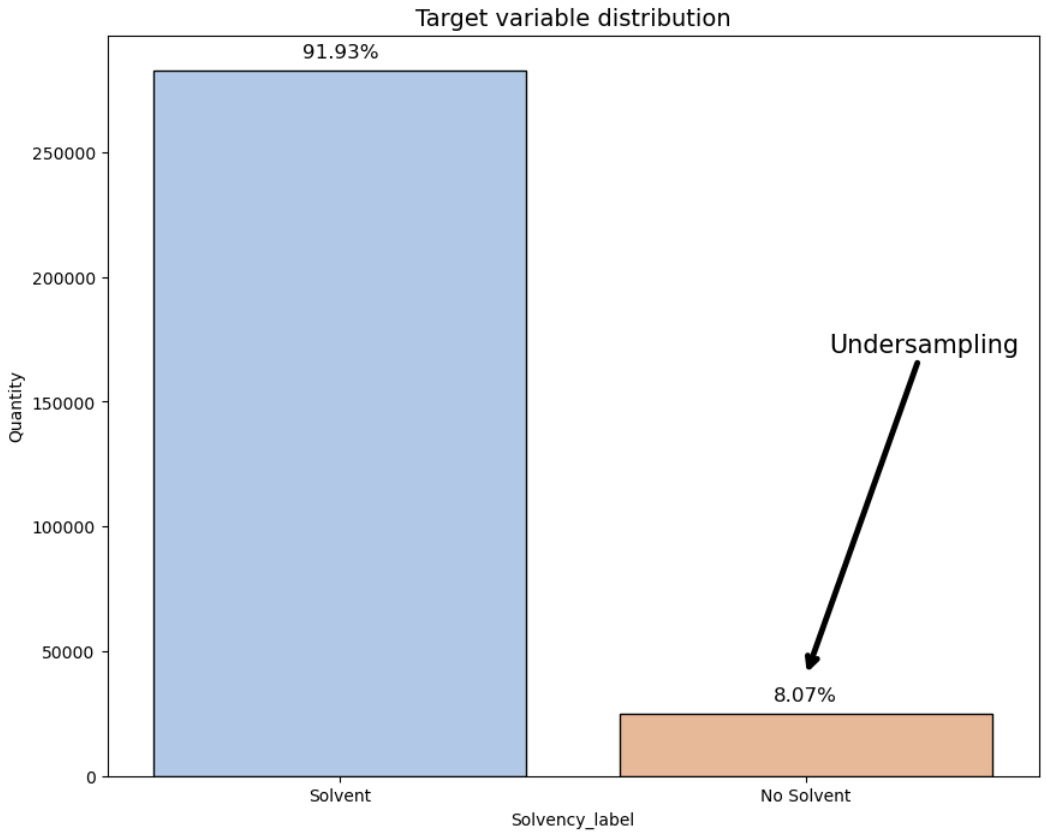

ref: NOTEBOOK: 01_Exploración_general

In [78]:
from sklearn.model_selection import train_test_split

## Como tenemos un dataset con undersampling, vamos aplicar stratify para que la proporción se 
## mantenga
x_train, x_test, y_train, y_test = train_test_split(df_loan.drop('TARGET', axis=1),
                                                    df_loan['TARGET'],
                                                    stratify=df_loan['TARGET'],
                                                    test_size=0.2)

df_loan_train = pd.concat([x_train, y_train], axis=1)
df_loan_test = pd.concat([x_test, y_test], axis=1)

In [79]:
## Comprobación de que se han mantenido las distribuciones 
print('== Train\n', df_loan_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_loan_test['TARGET'].value_counts(normalize=True))
df_loan_train.head()

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


,OWN_CAR_AGE,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_OWN_REALTY,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,TARGET
173355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.602824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315472,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,1.0,1.0,1.0,1.0,0.263144,180000.0,13234.5,2.0,-1349.0,0,0,Cash loans,F,N,0,1,0,0,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,215640.0,90000.0,1,1,1,0,0,0,0,10,TUESDAY,2,2,0,1,Trade: type 7,1,1,1,-12,-347.0,-5257,-16462,0.025164,House / apartment,Civil marriage,Secondary / secondary special,Working,300890,0
170831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Managers,0.108226,0.0,0.0,0.0,0.0,1.0,1.0,"Spouse, partner",3.0,0.0,3.0,0.0,0.595476,270000.0,13500.0,3.0,-391.0,1,0,Revolving loans,F,N,0,0,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,270000.0,99000.0,0,0,0,0,0,0,0,15,WEDNESDAY,2,2,0,1,Postal,1,1,1,-1091,-1673.0,-329,-8417,0.035792,House / apartment,Civil marriage,Higher education,Working,297974,0
183440,NaN,0.0704,0.0708,0.0692,0.0000,0.0000,0.000,0.371694,0.0098,0.0093,0.0095,0.00,0.00,0.0000,"Stone, brick",0.0729,0.0722,0.0735,0.1379,0.1379,0.1379,0.0638,0.0664,0.0649,block of flats,0.1667,0.1667,0.1667,0.9791,0.9791,0.9791,0.0502,No,High skill tech staff,0.809508,0.0,0.0,0.0,0.0,1.0,0.0,Family,3.0,0.0,3.0,0.0,0.753680,292500.0,16789.5,3.0,-1836.0,1,0,Cash loans,F,N,0,0,0,1,0,0,0,0,0,0,Y,0,0,0,0,0,0,0,0,0,292500.0,261000.0,0,0,0,0,0,0,0,15,THURSDAY,2,2,0,1,Medicine,1,1,1,-191,-8224.0,-5884,-14494,0.018634,House / apartment,Married,Secondary / secondary special,Working,312621,0
245350,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.620240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513694,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,3.0,0.0,3.0,0.0,0.535325,225000.0,22468.5,2.0,-2050.0,0,0,Cash loans,M,Y,0,1,0,0,0,0,0,0,0,0,N,0,0,0,0,0,0,0,0,0,284400.0,135000.0,1,0,0,0,0,0,0,12,THURSDAY,2,2,0,1,School,1,1,1,-1067,-1891.0,-704,-17533,0.022800,House / apartment,Married,Secondary / secondary special,Working,383948,0
148115,NaN,0.0000,0.0000,0.0000,0.0347,0.0347,0.

In [95]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    """
    sns.set_palette("pastel")

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), dpi=90)

    # Contar nulos antes de cualquier transformación
    count_null = df[col_name].isnull().sum()

    if isContinuous:
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        # Como hay numéricas que son categorías, transformo a str para poder contar bien los nan
        col_temp = df[col_name].copy()
        col_temp = col_temp.astype('str')  # Convertir todo a string para incluir NaN
        col_temp[df[col_name].isnull()] = 'NaN'  # Reemplazar valores nulos por 'NaN'
        sns.countplot(col_temp, order=sorted(col_temp.unique()), color='#5975A4', saturation=1, ax=ax1)

    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(f"{col_name} - Número de nulos: {count_null}")
    plt.xticks(rotation=90)

    if isContinuous:
        data_no_na = df[[col_name, target]].dropna()  # Excluye filas con NaN en las columnas relevantes
        sns.boxplot(x=target, y=col_name, data=data_no_na, ax=ax2)
        ## En Seaborn el eje X debe ser categórico, por eso antes no dejaba graficar ###

        ax2.set_ylabel('')
        ax2.set_title(f"{col_name} by {target}")
    else:
        data = df.groupby(col_temp)[target].value_counts(normalize=True).to_frame('proportion').reset_index()
        data.columns = [col_name, target, 'proportion']
        sns.barplot(x=col_name, y='proportion', hue=target, data=data, saturation=1, ax=ax2)
        ax2.set_ylabel(f"{target} fraction")
        ax2.set_title(target)
        plt.xticks(rotation=90)
    ax2.set_xlabel(col_name)

    plt.tight_layout()

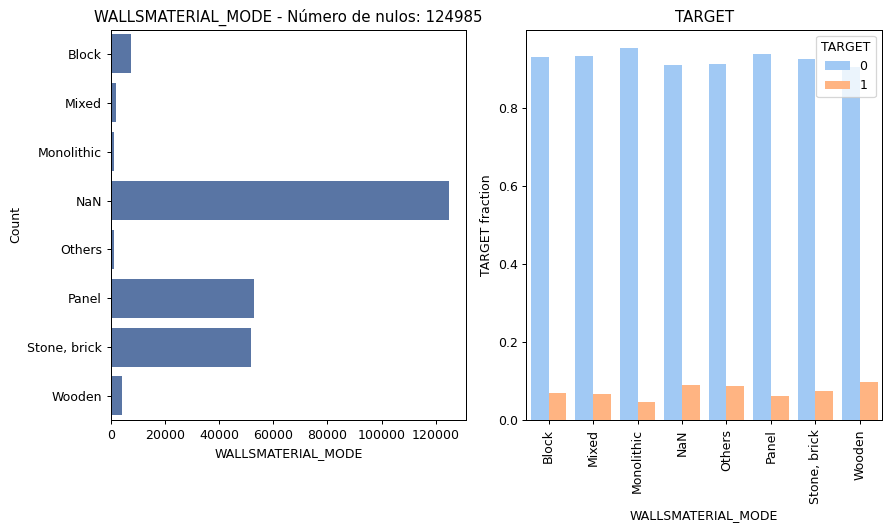

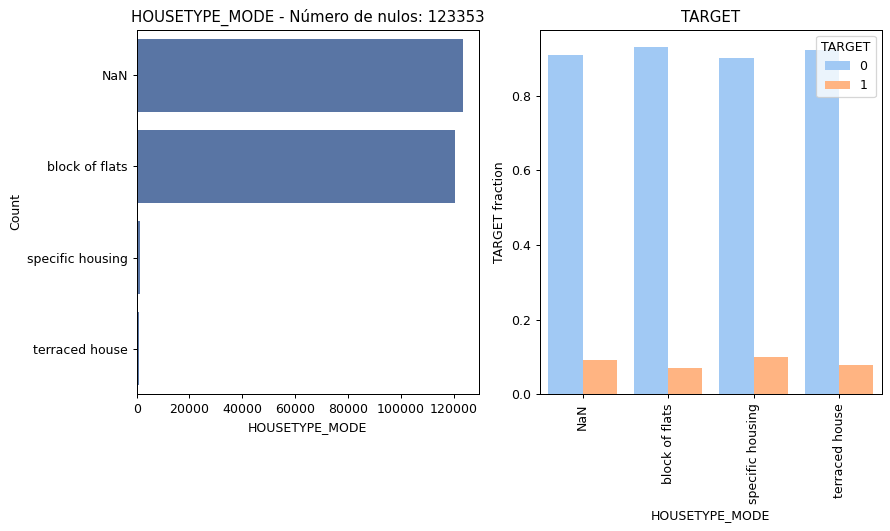

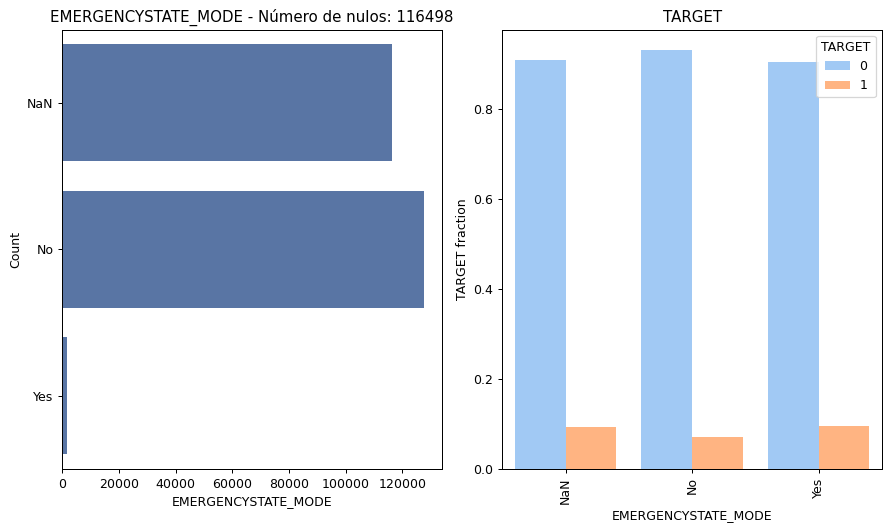

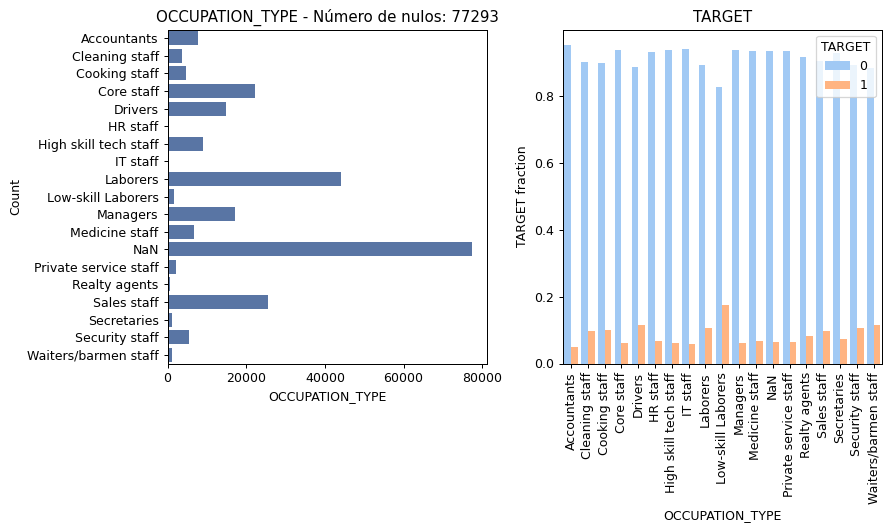

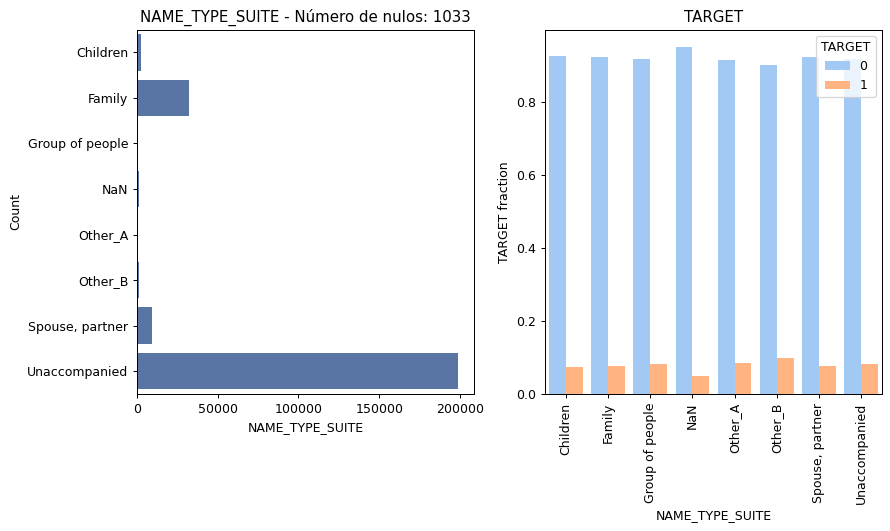

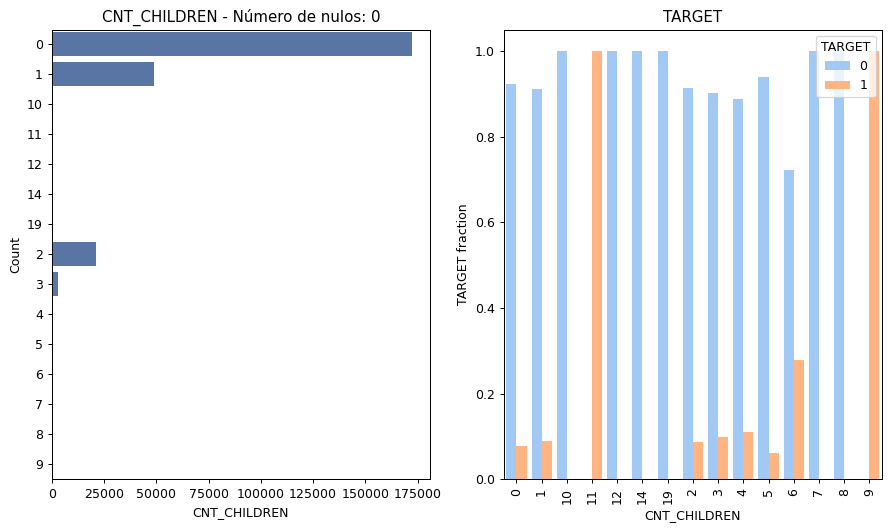

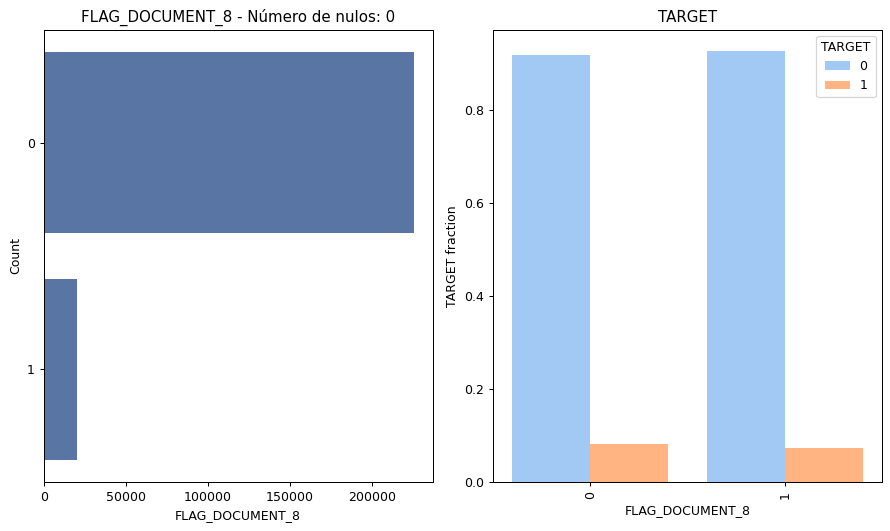

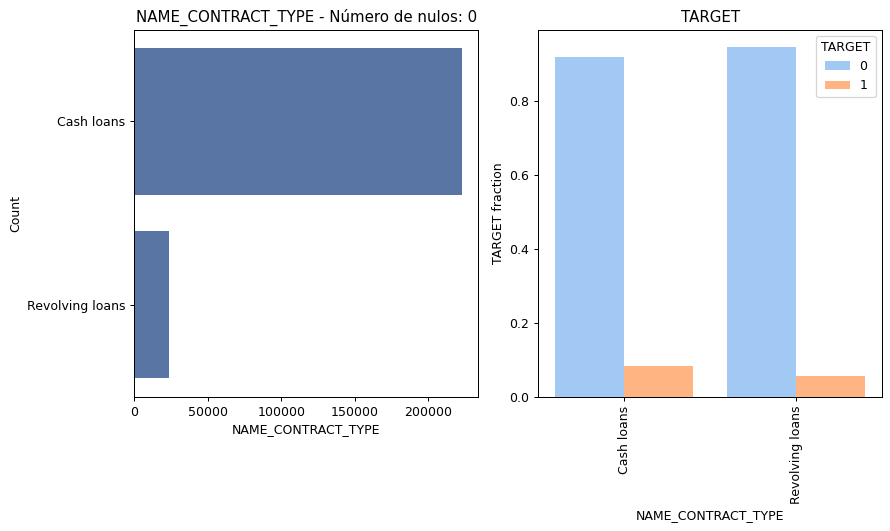

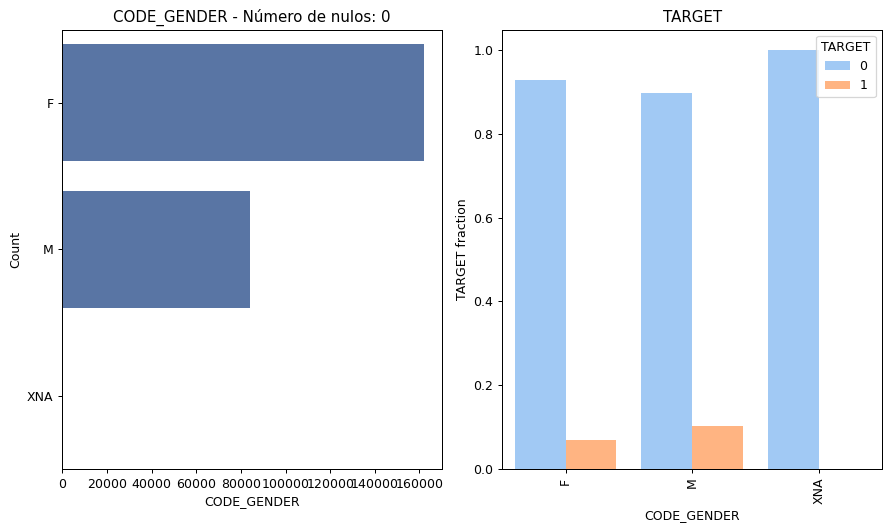

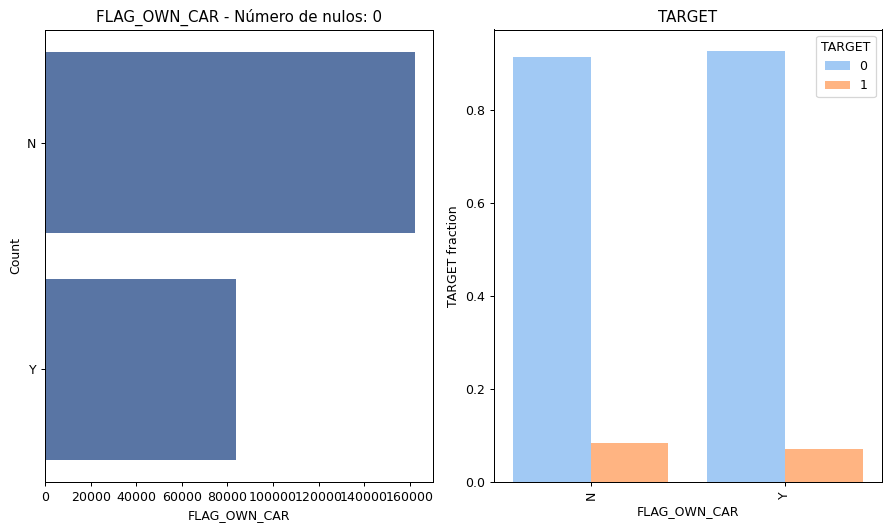

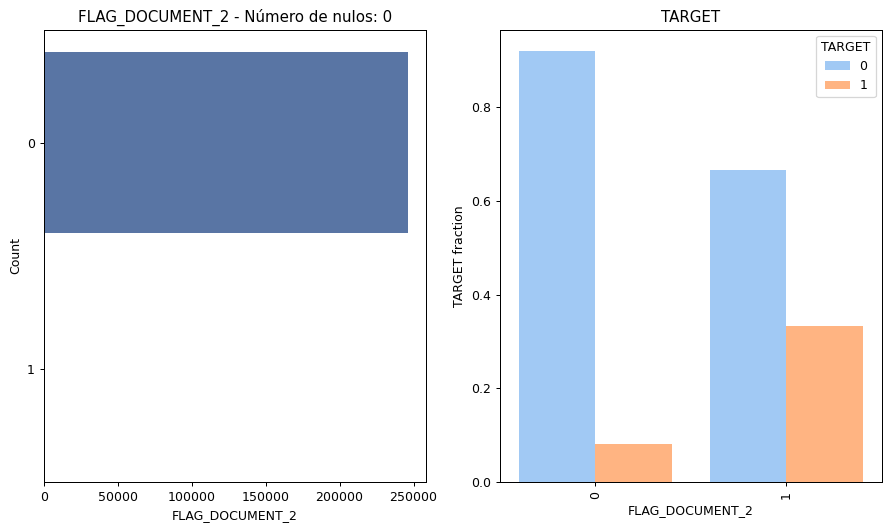

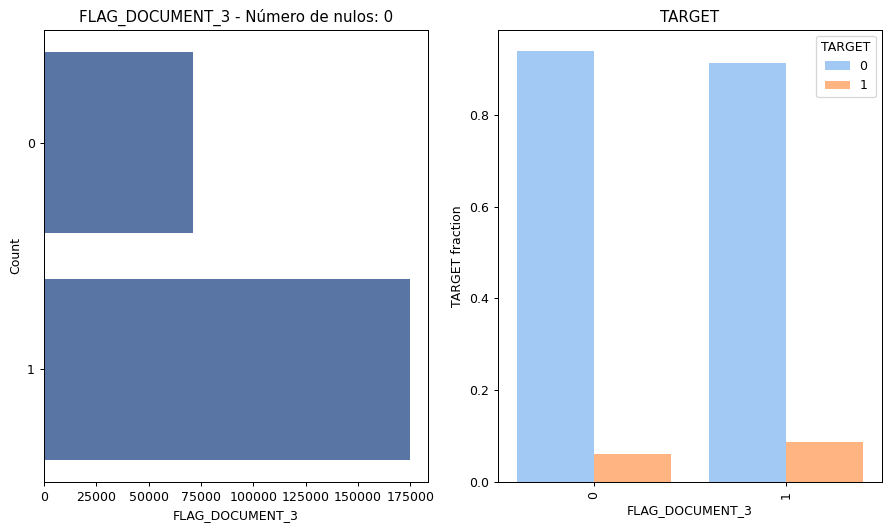

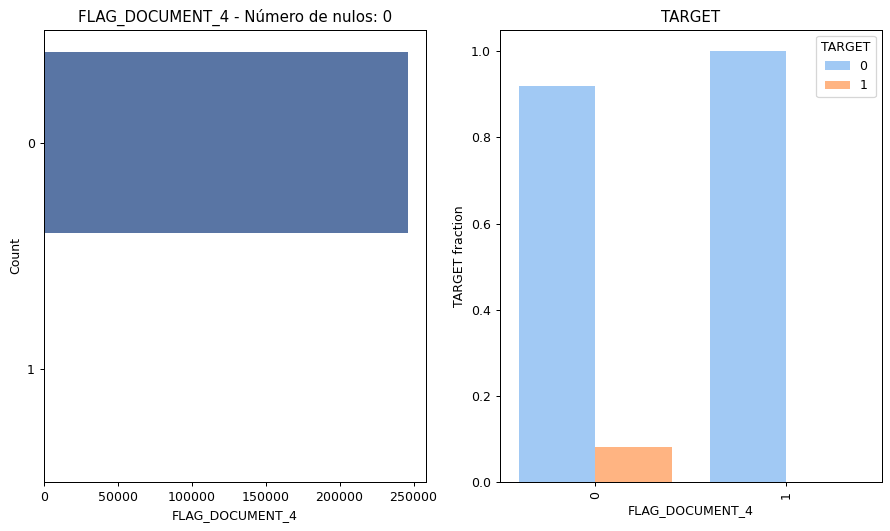

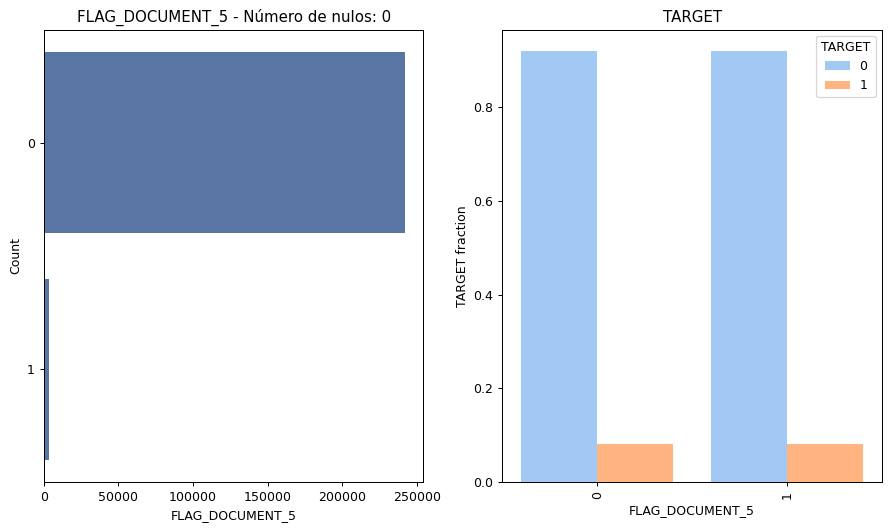

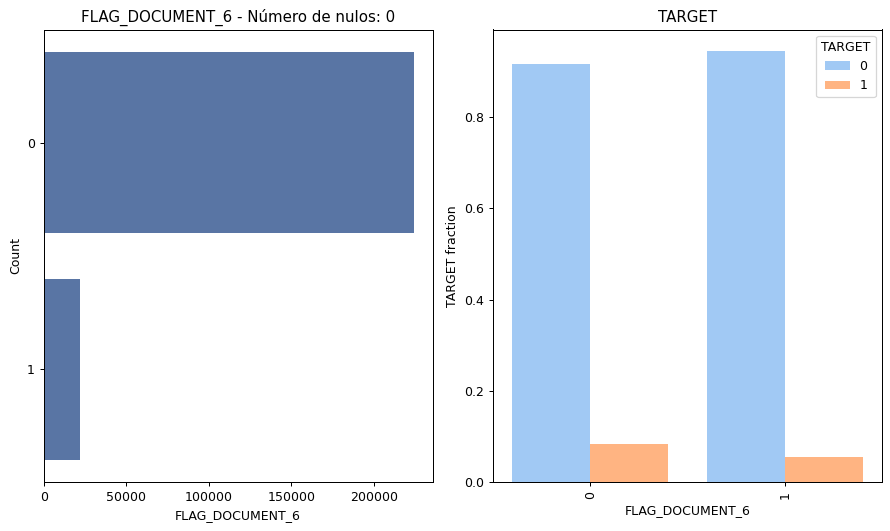

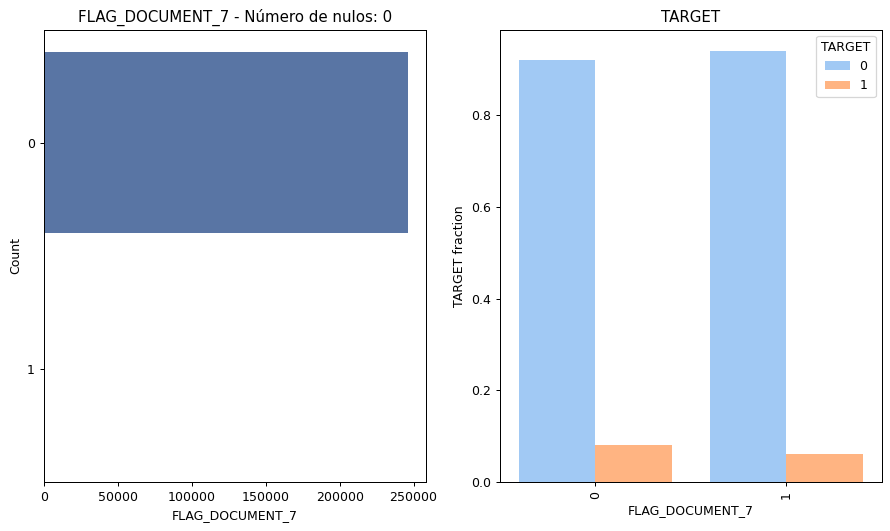

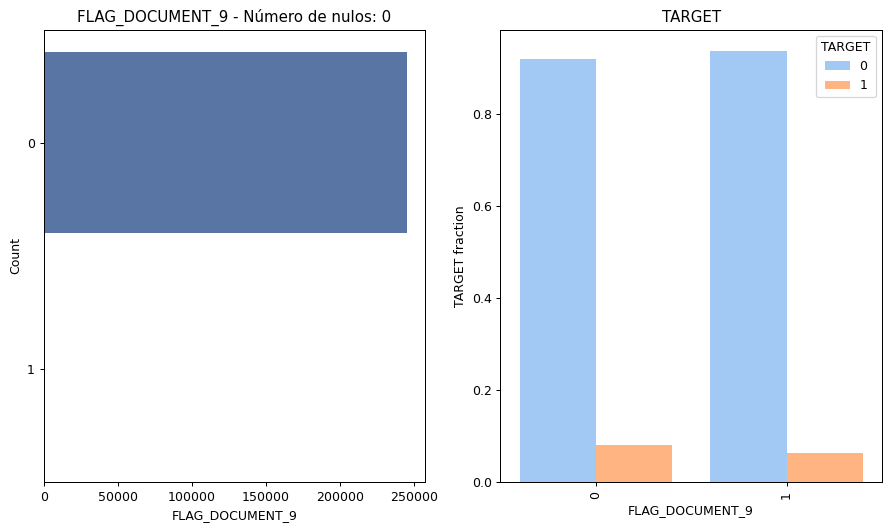

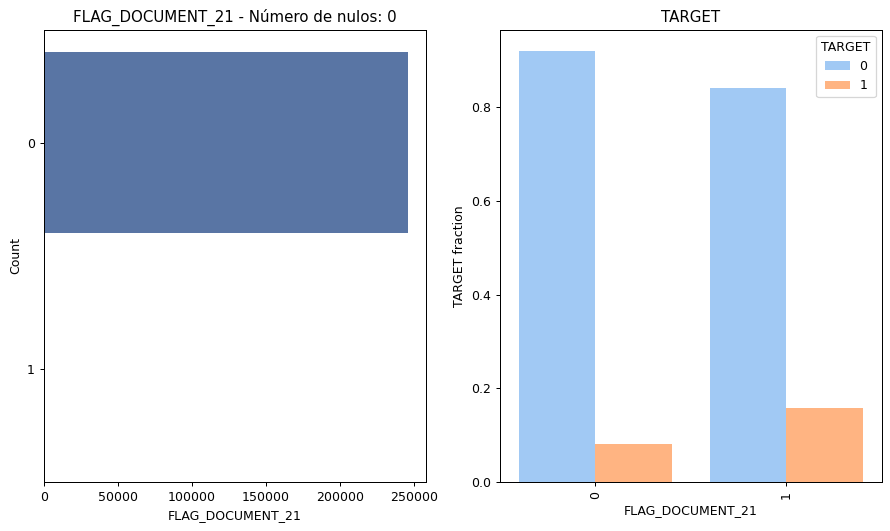

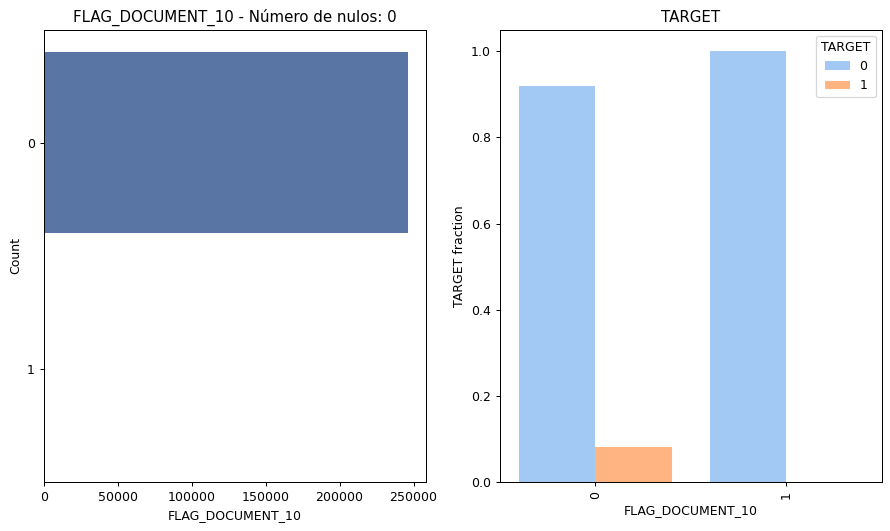

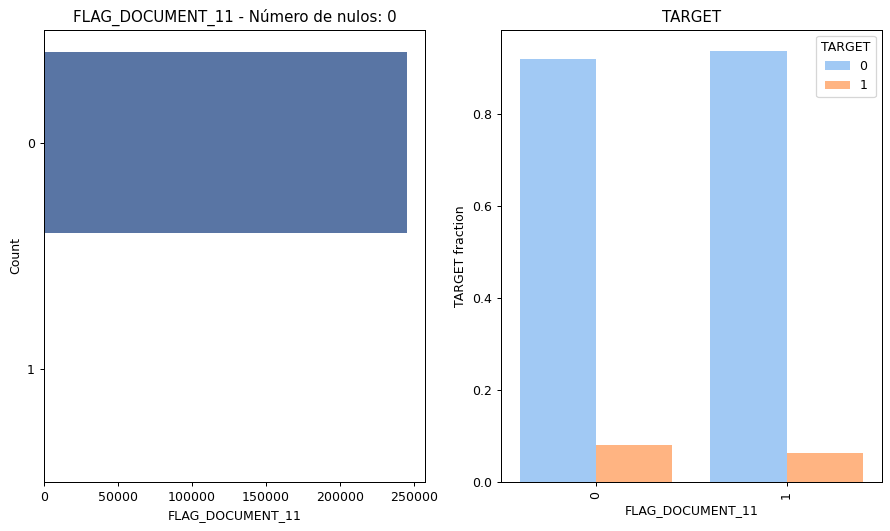

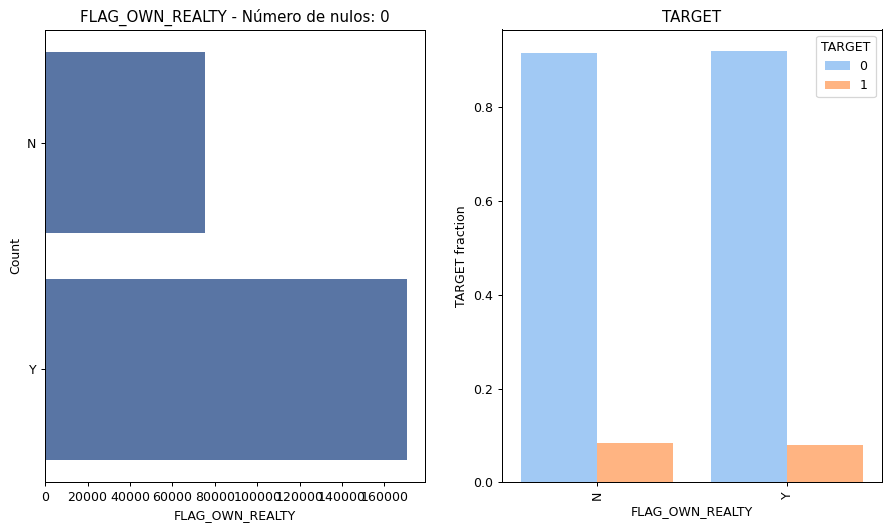

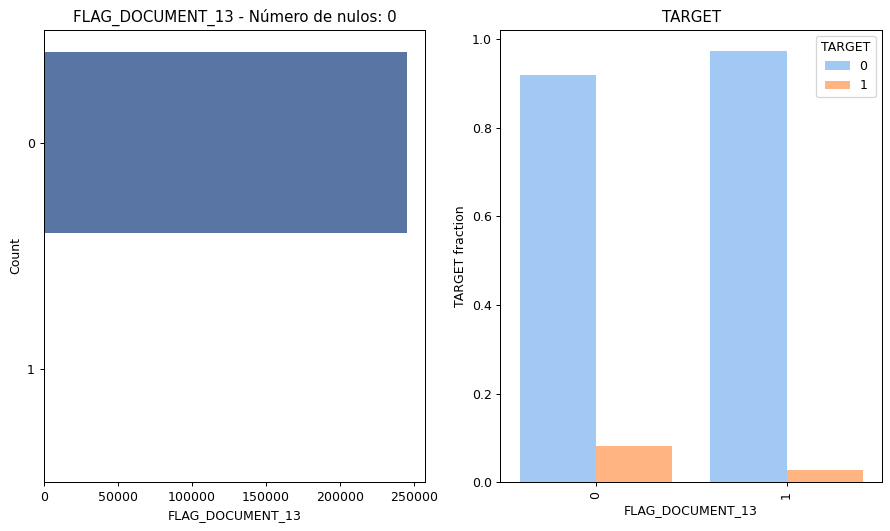

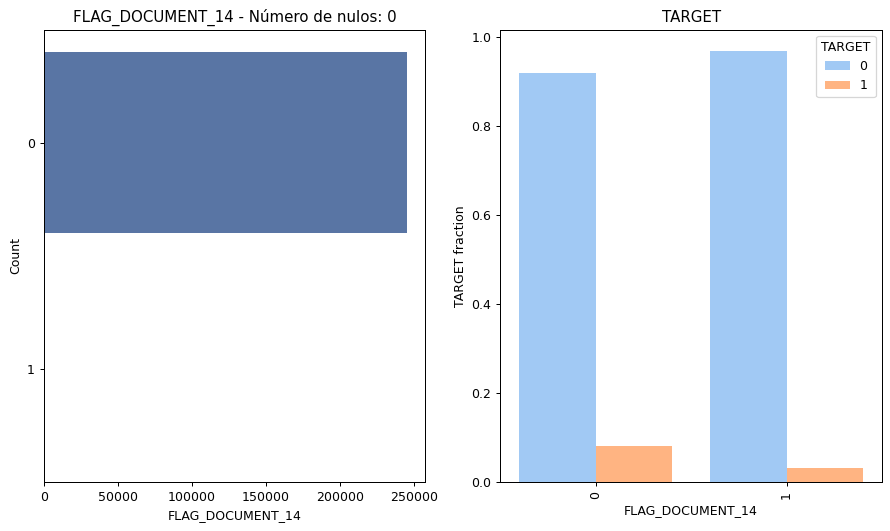

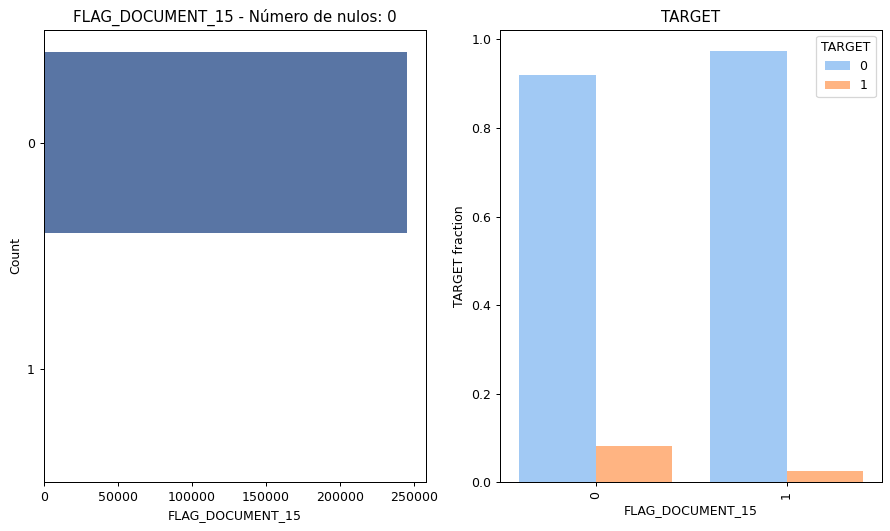

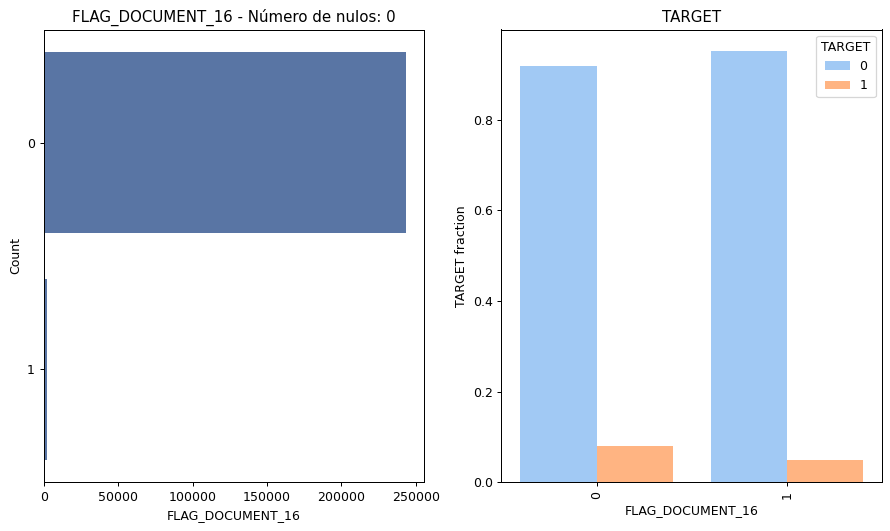

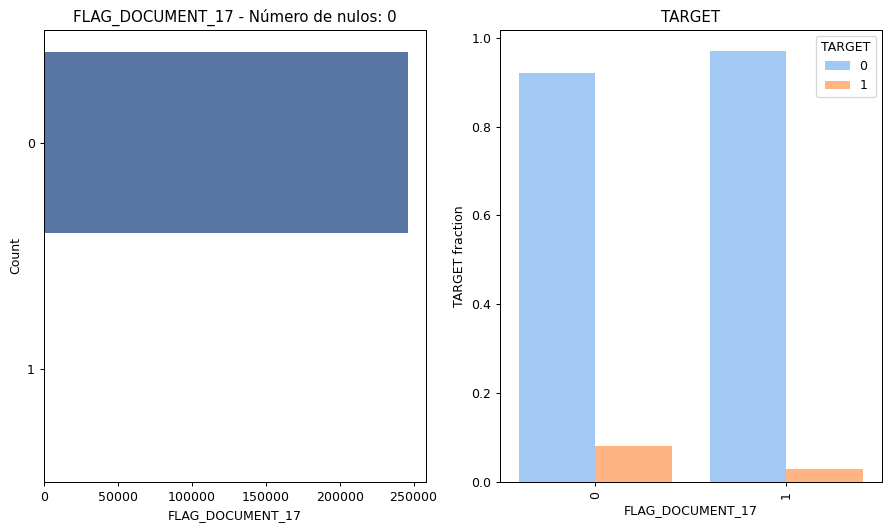

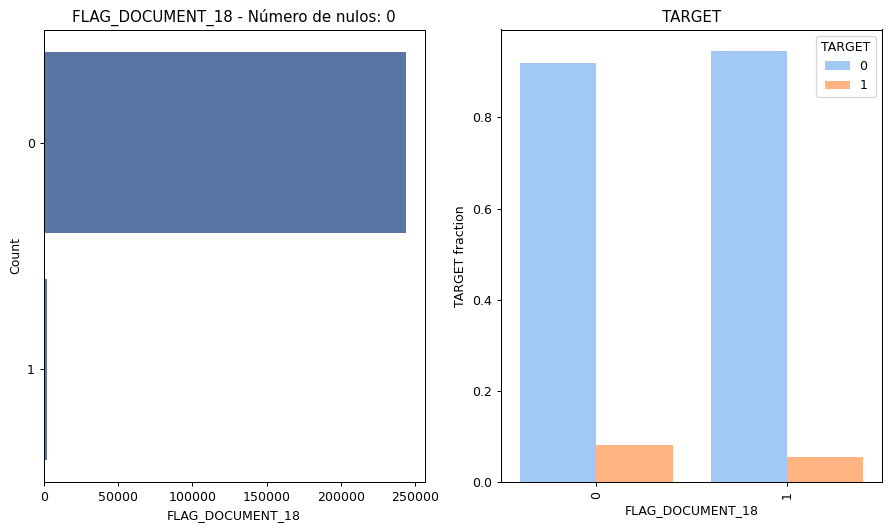

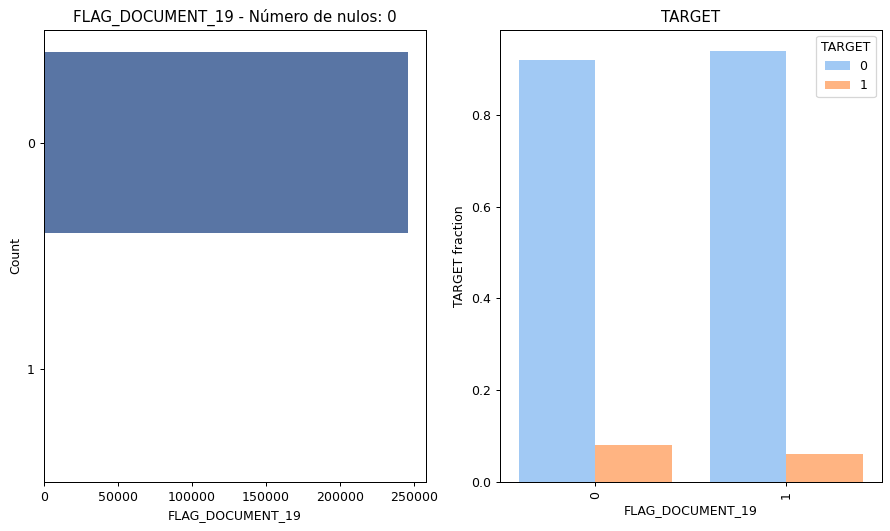

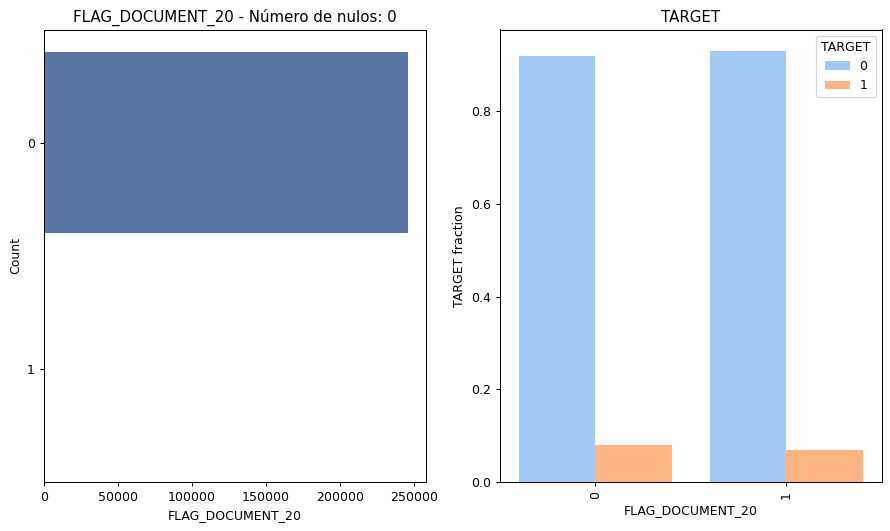

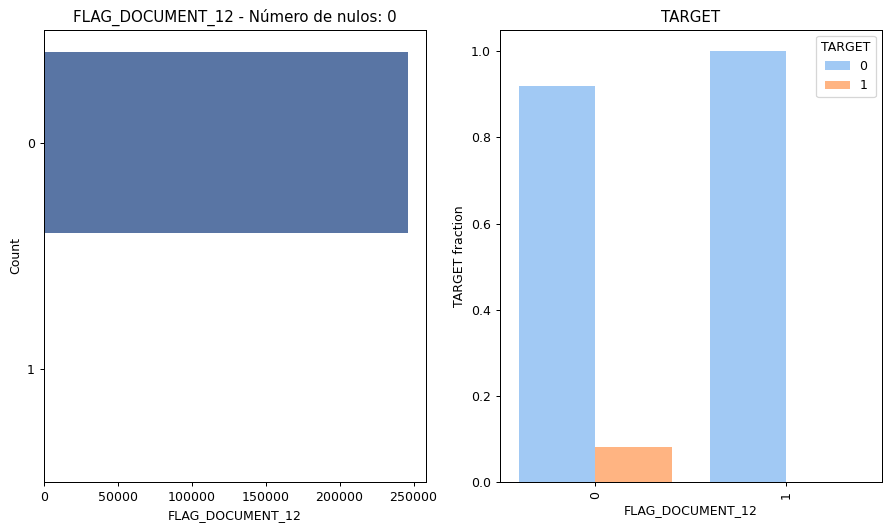

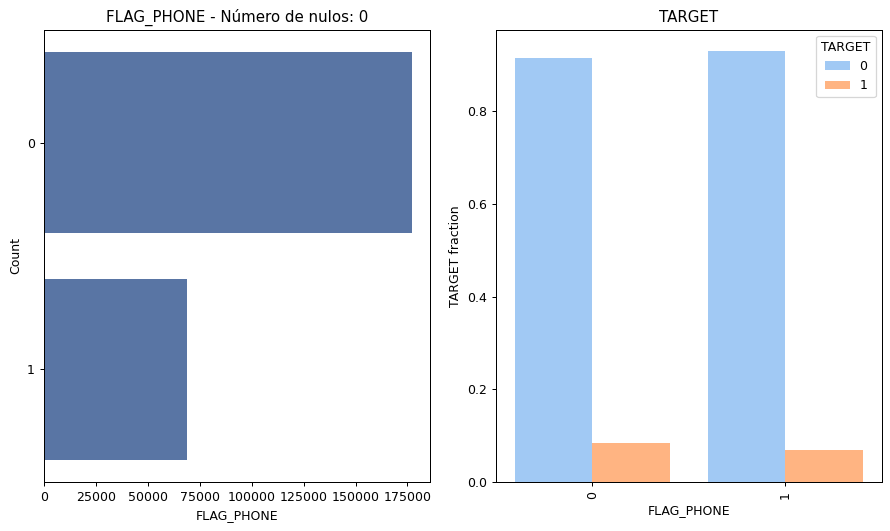

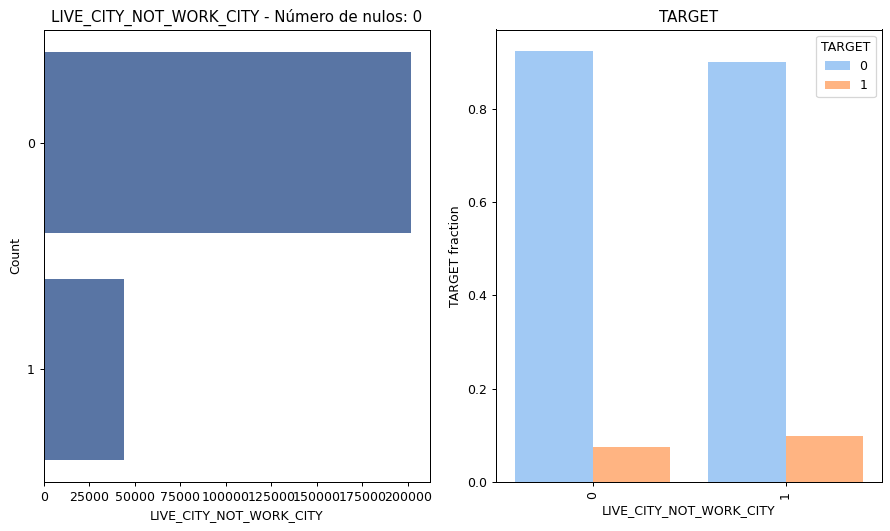

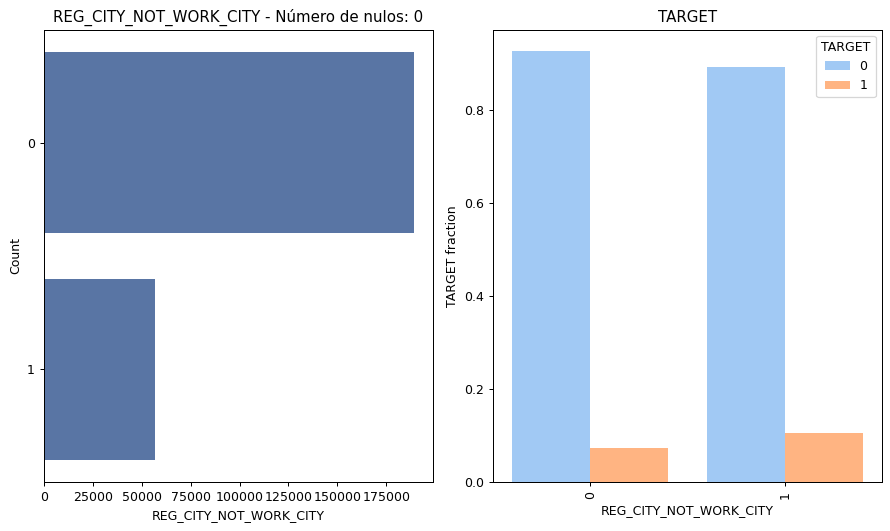

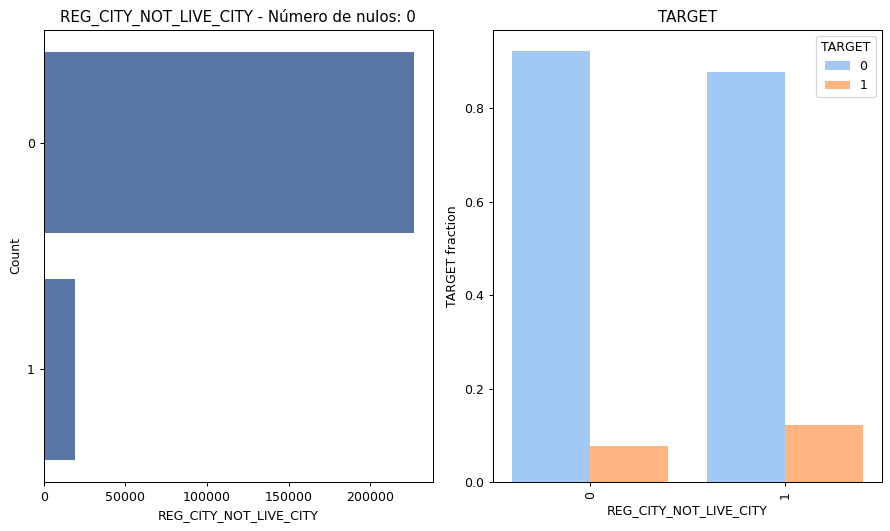

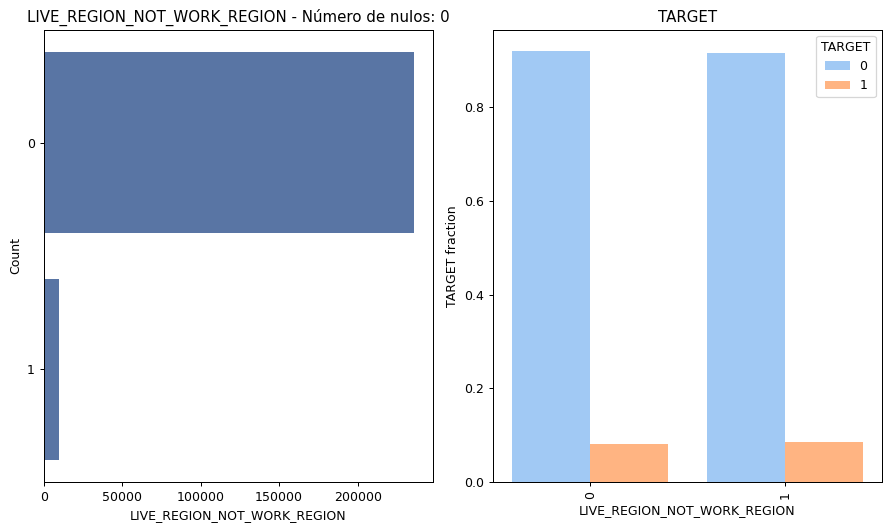

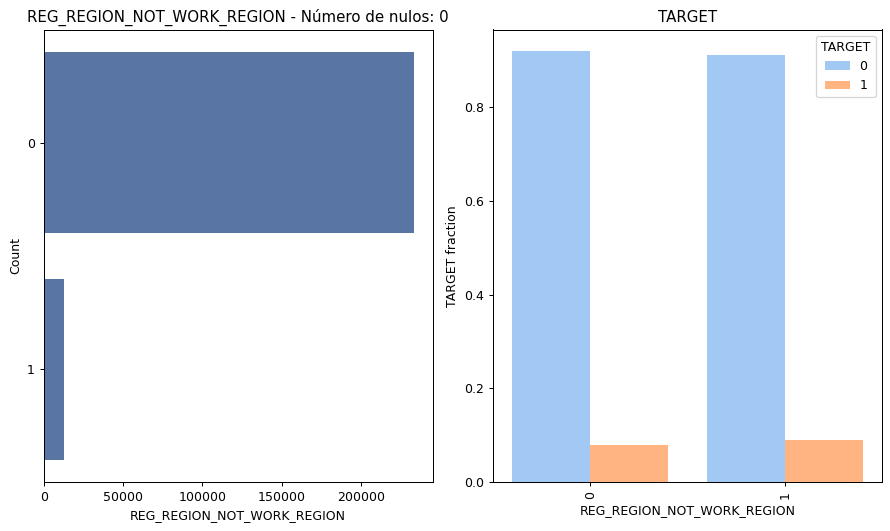

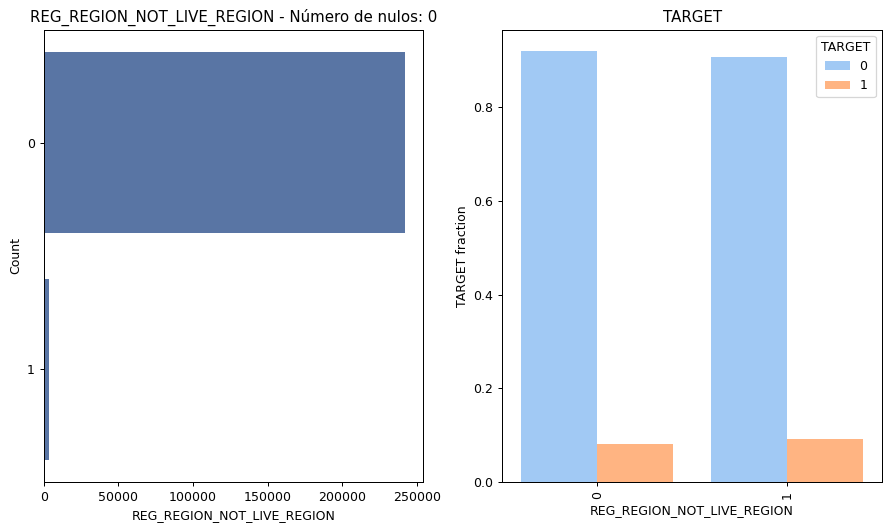

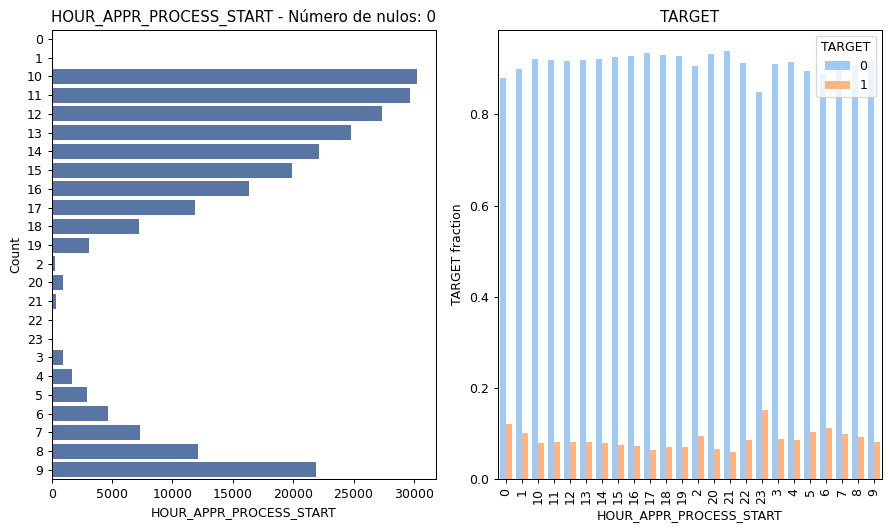

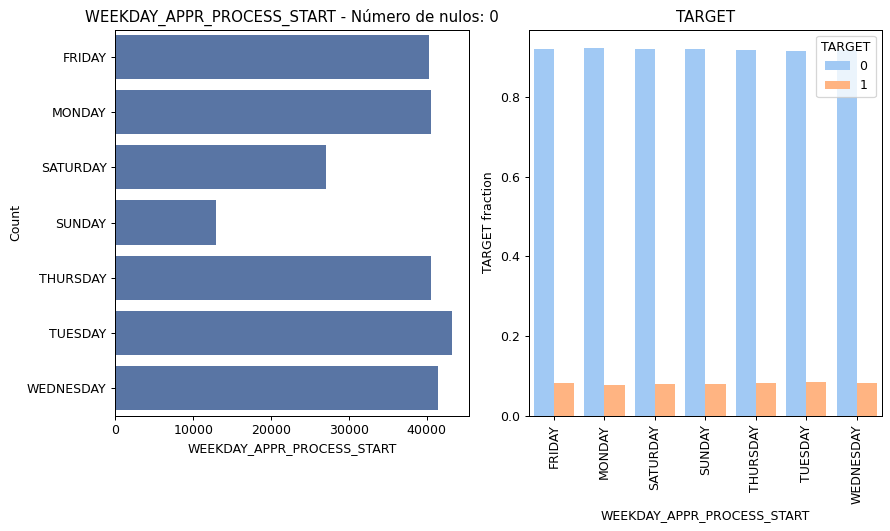

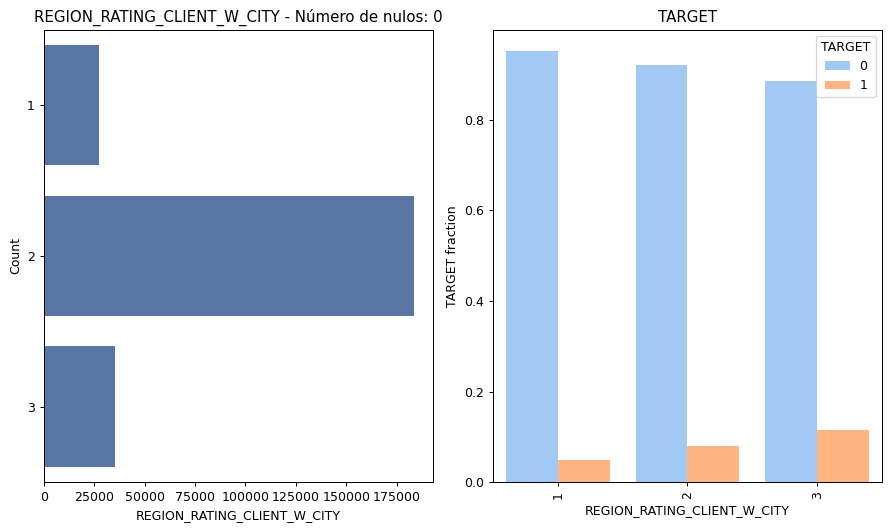

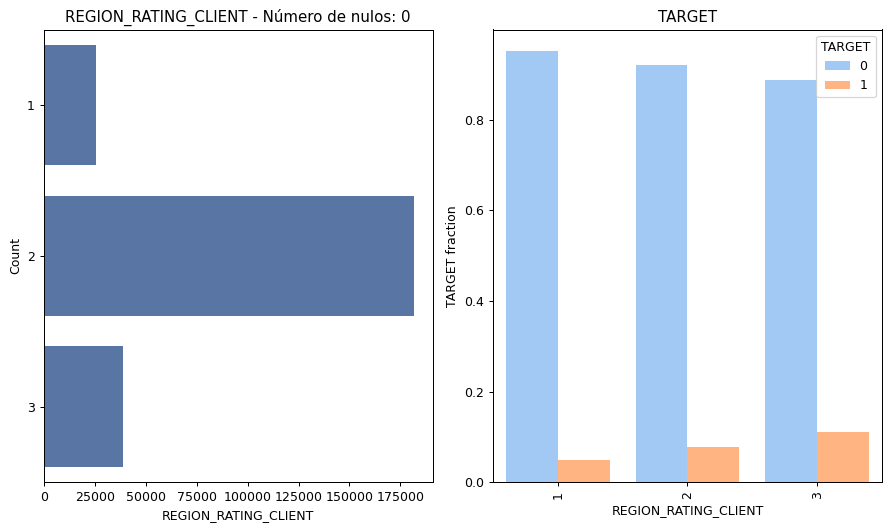

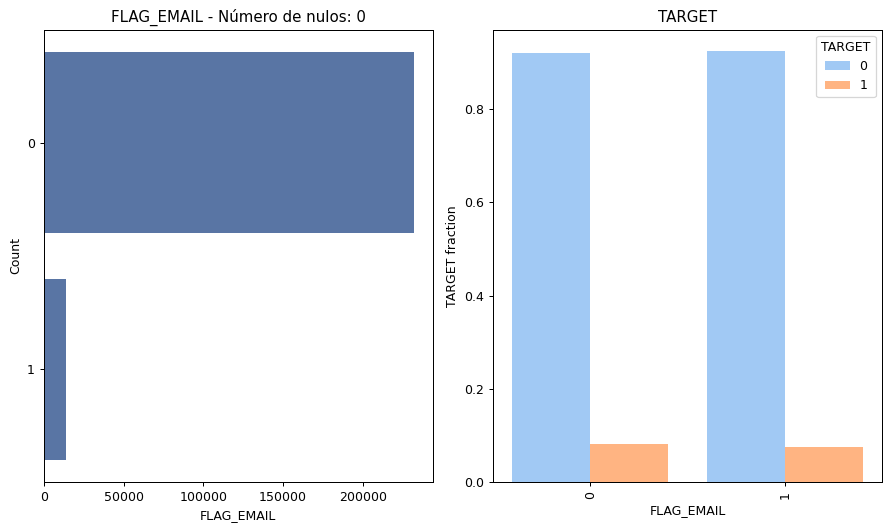

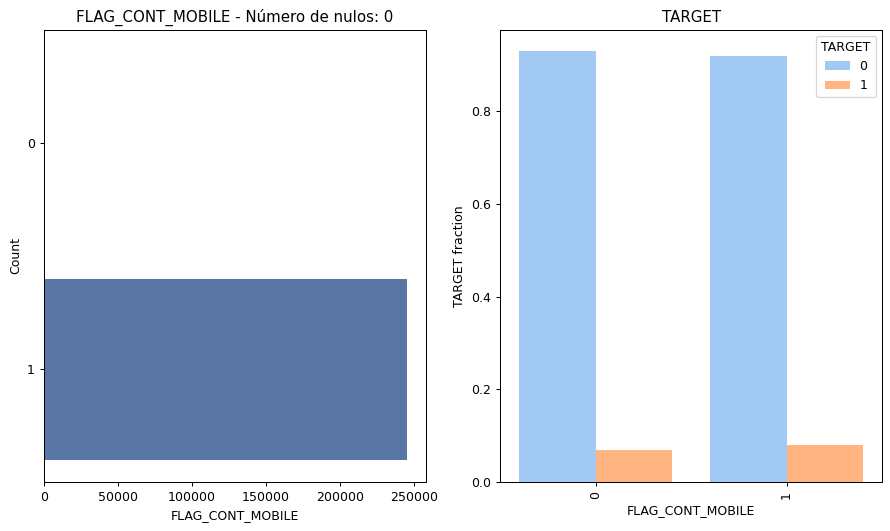

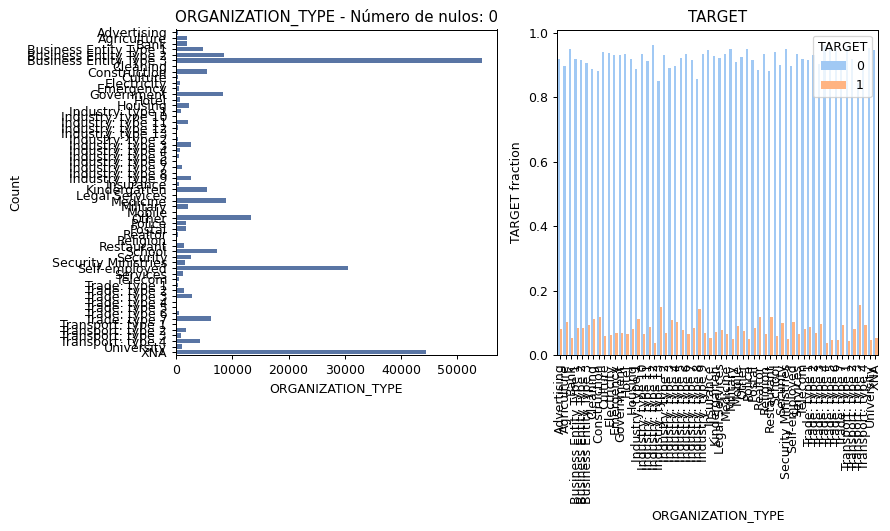

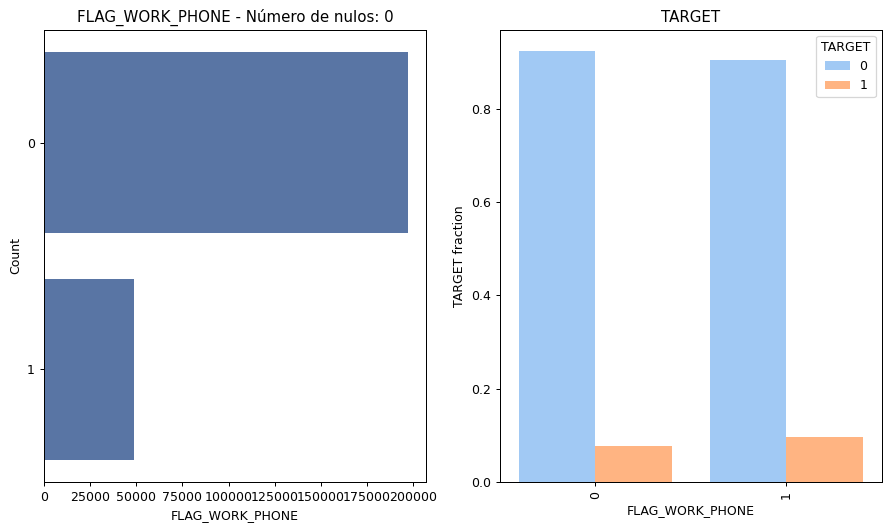

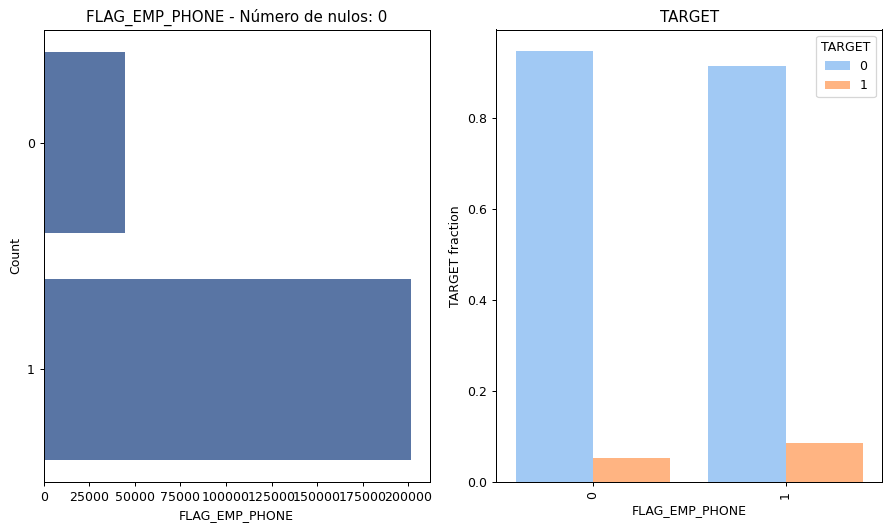

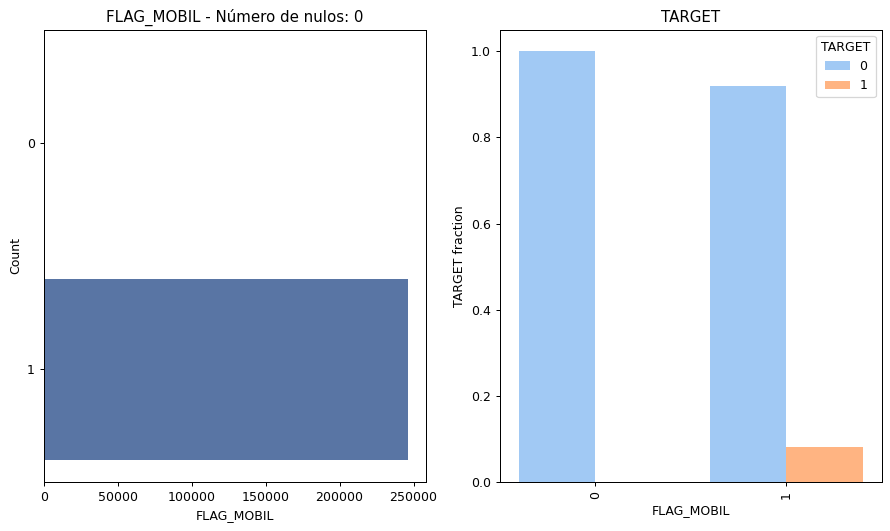

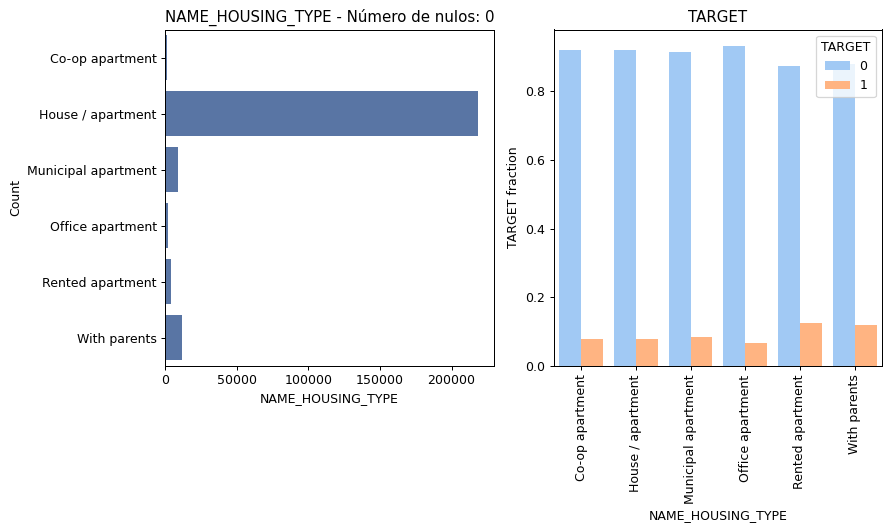

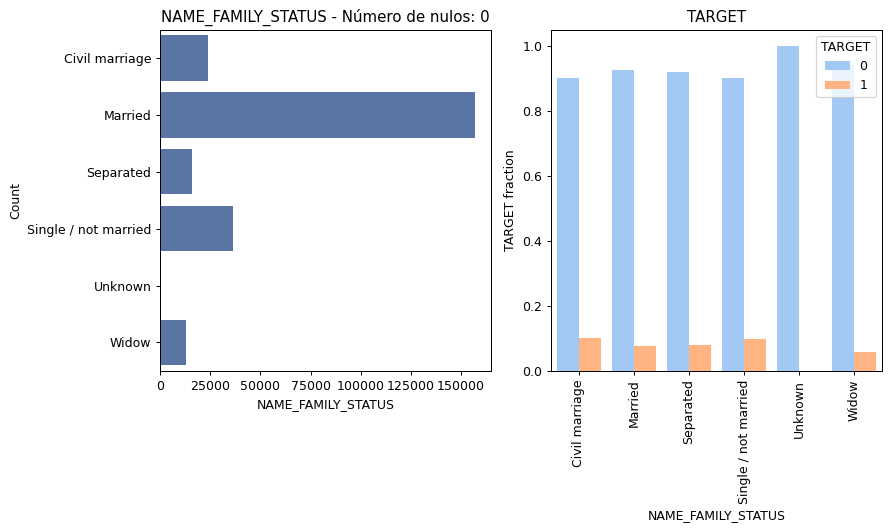

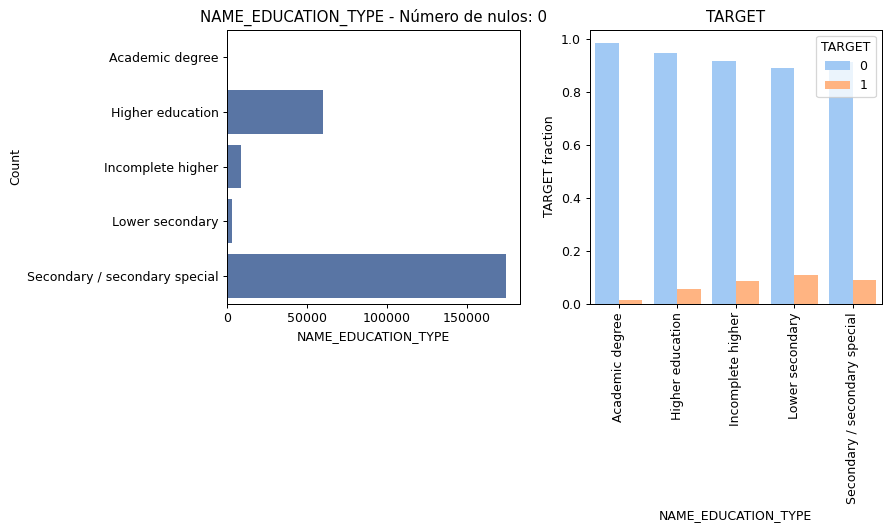

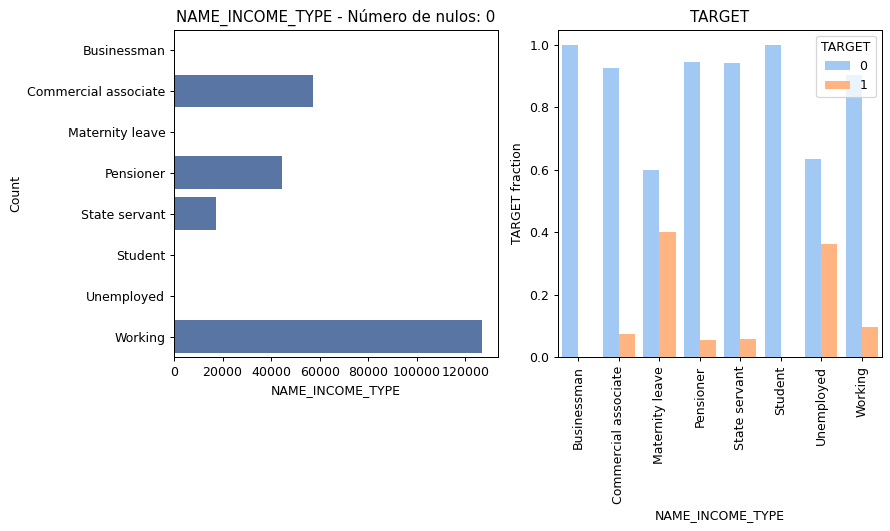

In [ ]:
# Ejemplo de uso en el bucle
for i in lista_categorias:
    if i != 'TARGET':
        plot_feature(df_loan_train, col_name=i, isContinuous=False, target='TARGET')
    
    plt.show()  ## para que según se van generando vayan apareciendo


In [ ]:
columnas_continuas = [col for col in df_loan_train.columns if col not in lista_categorias]

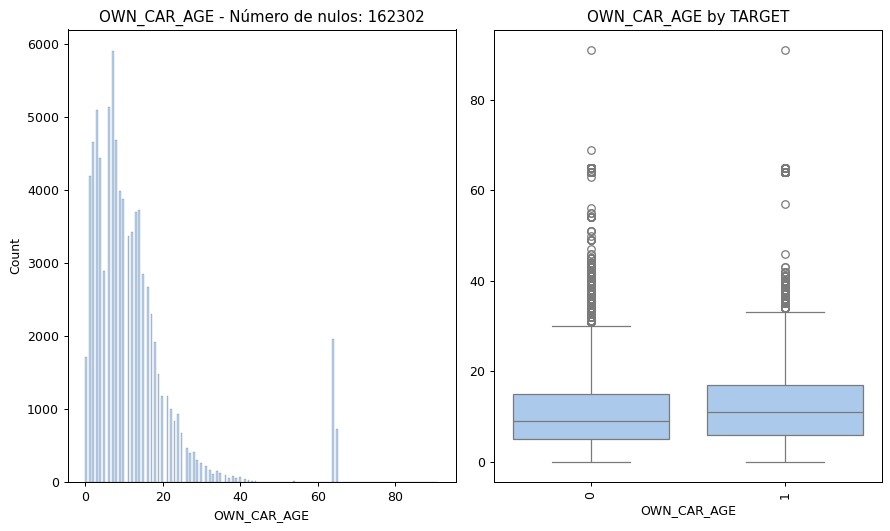

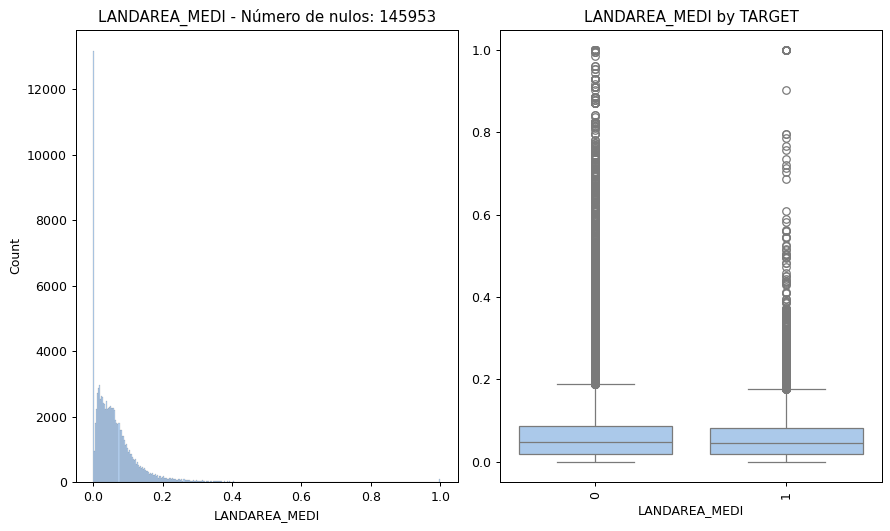

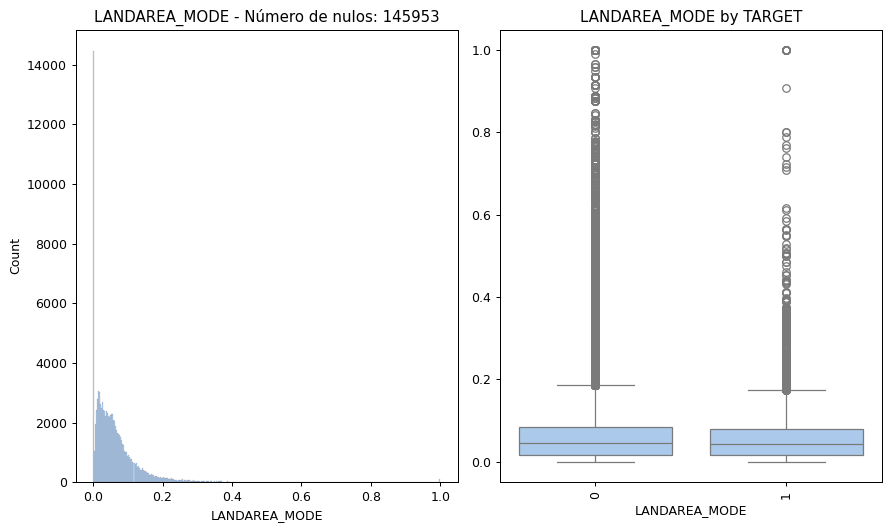

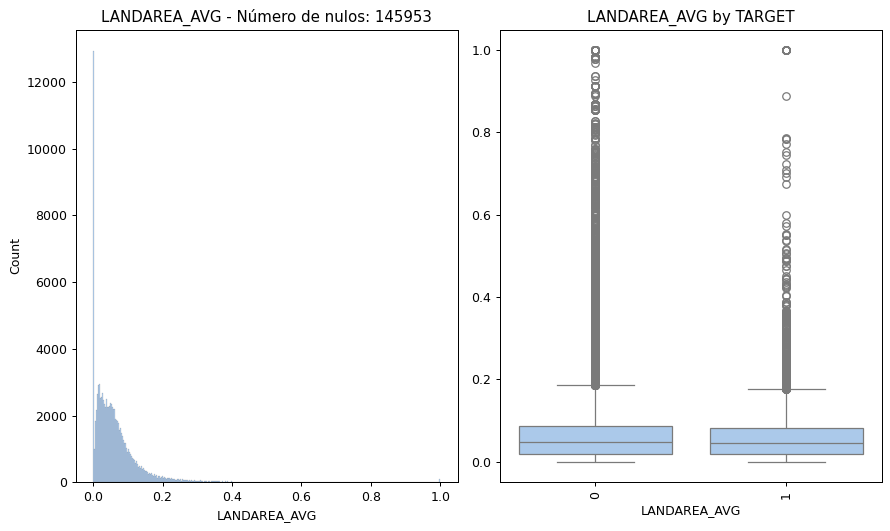

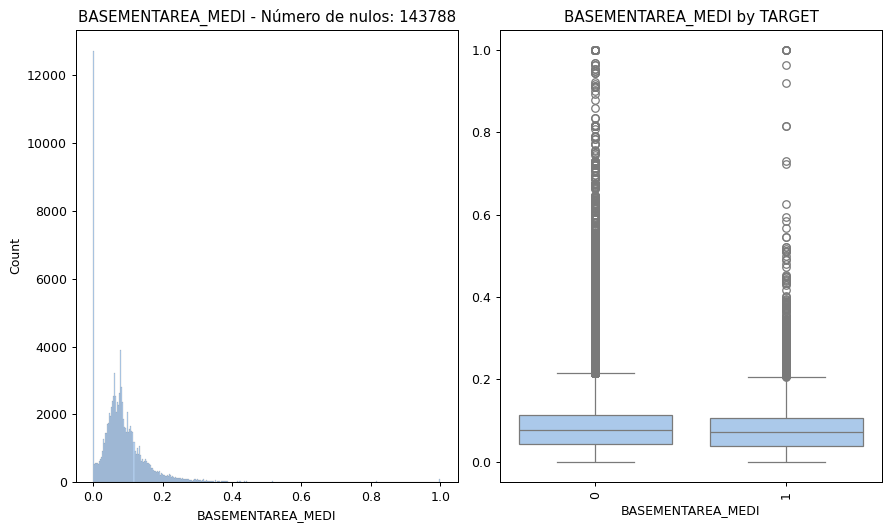

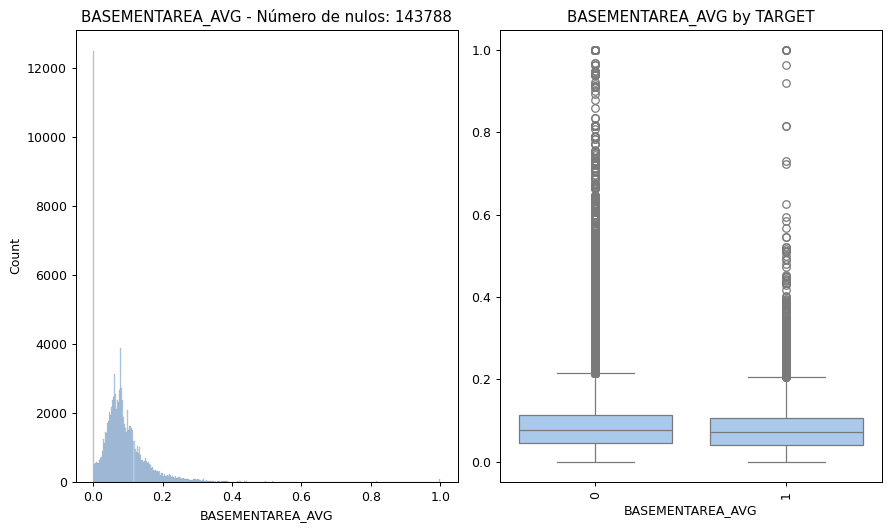

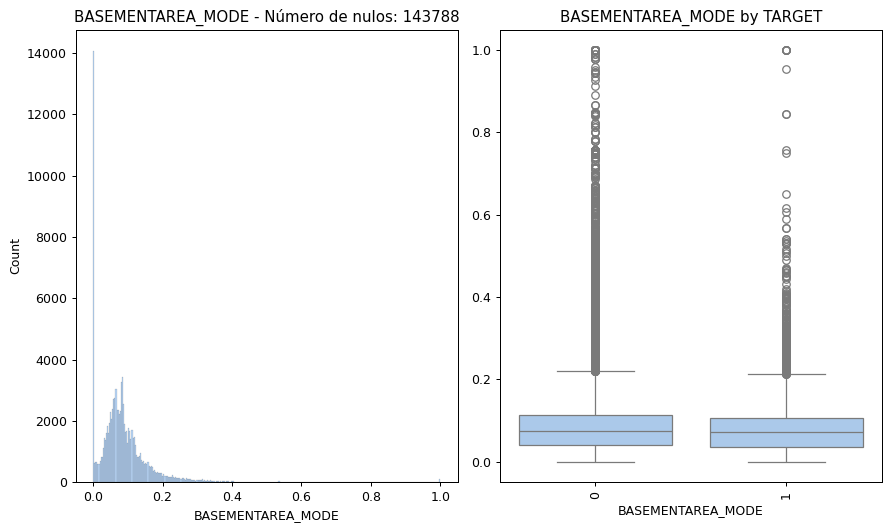

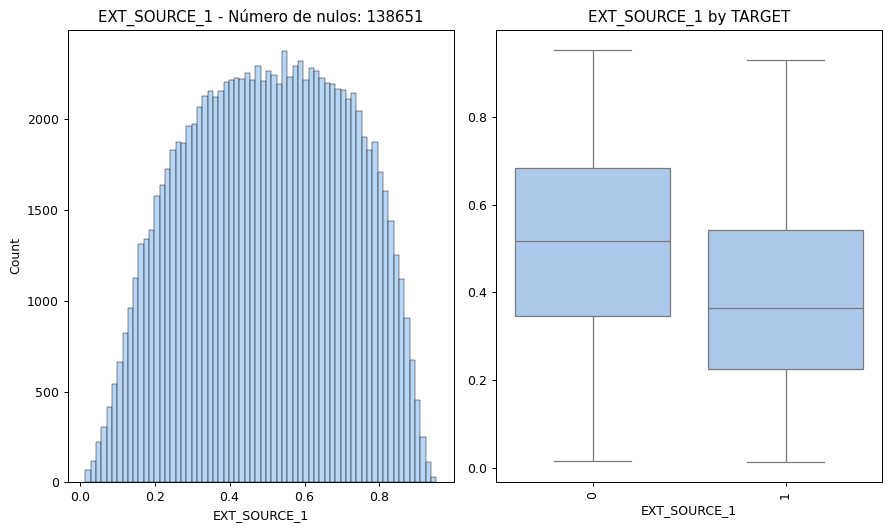

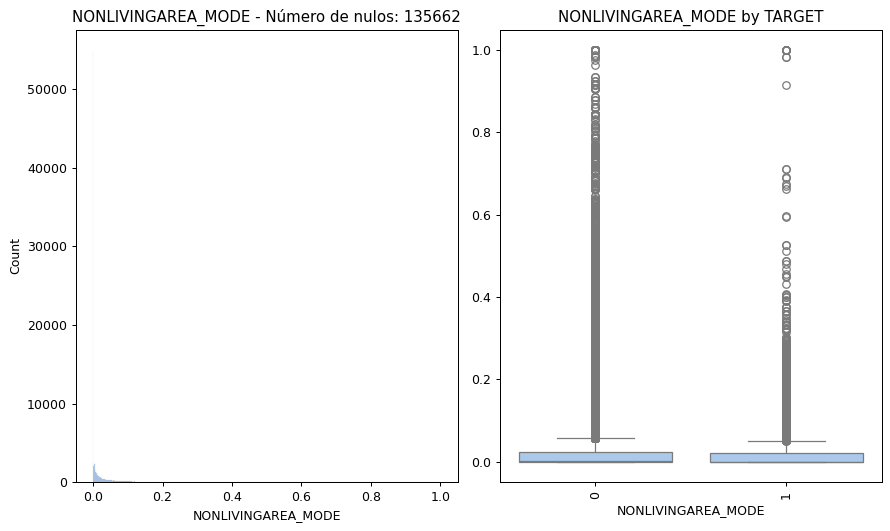

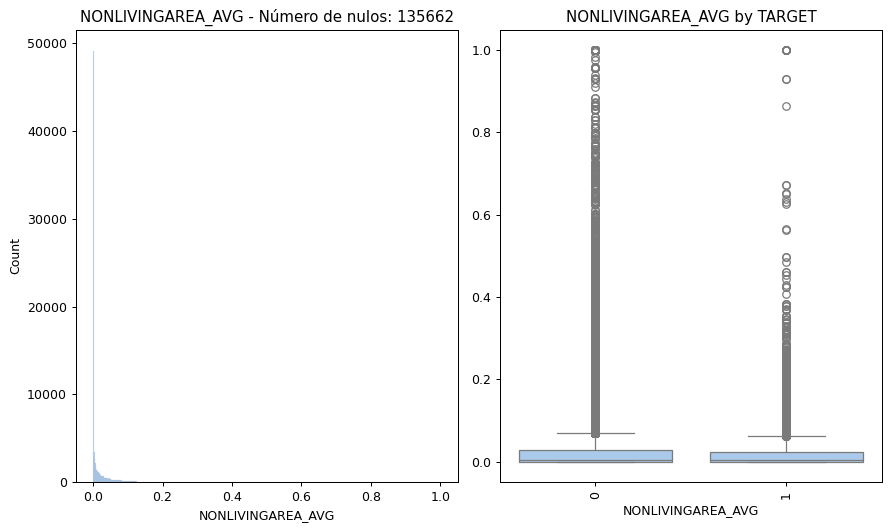

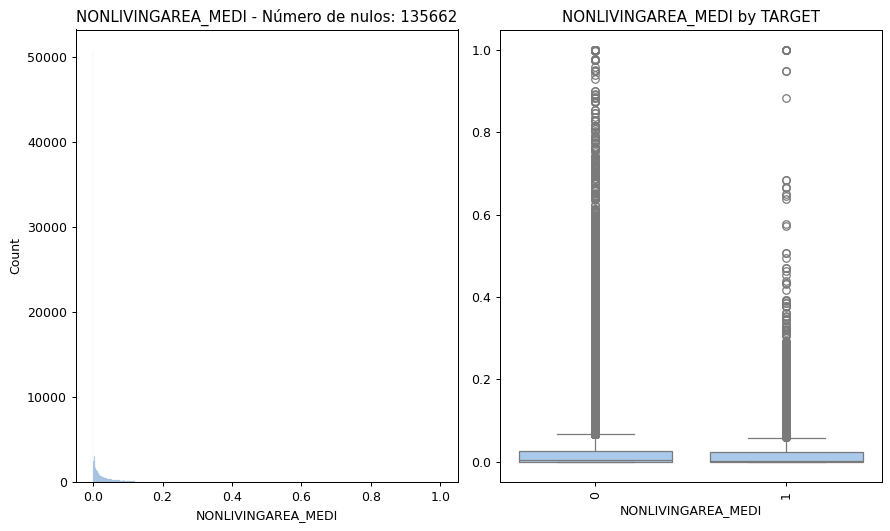

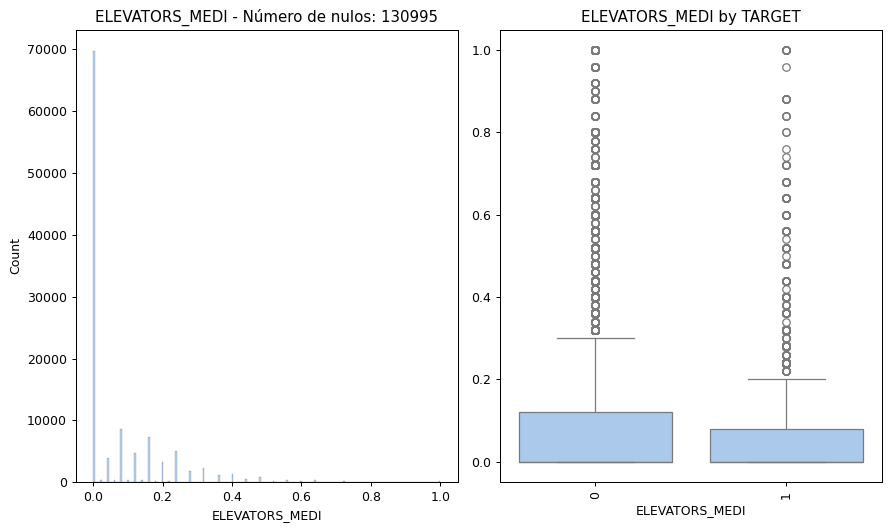

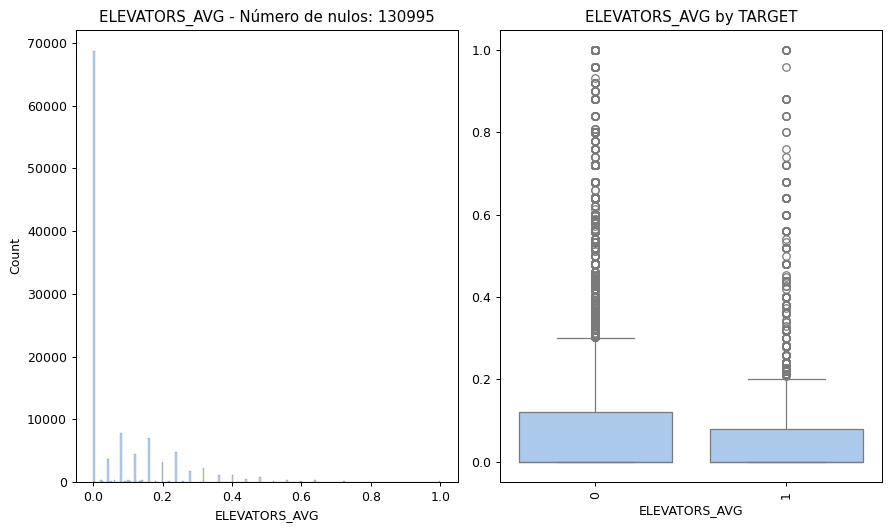

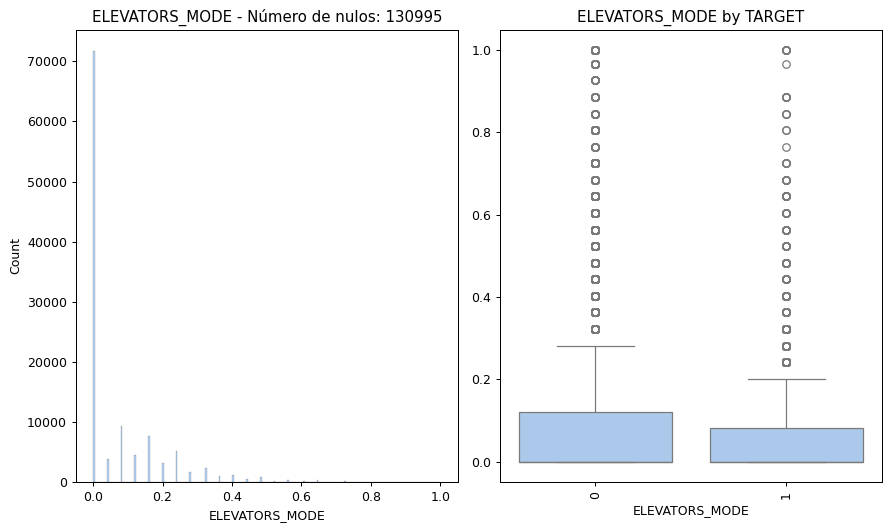

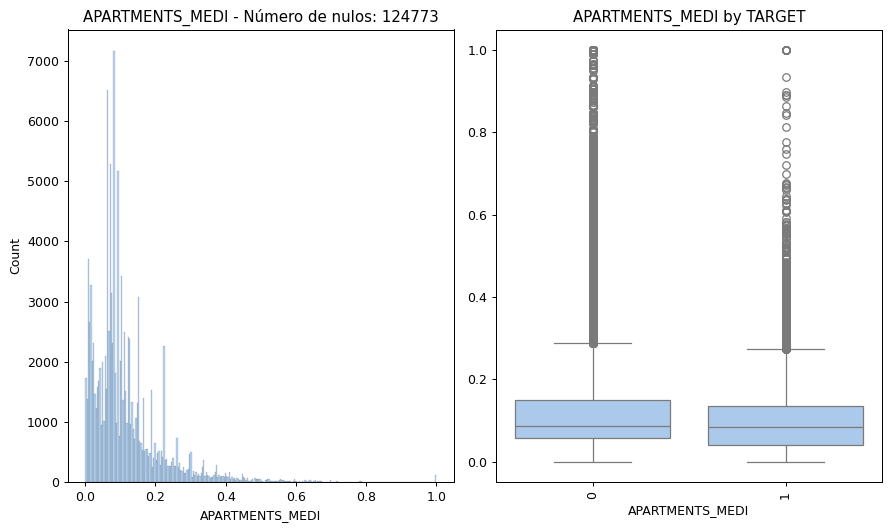

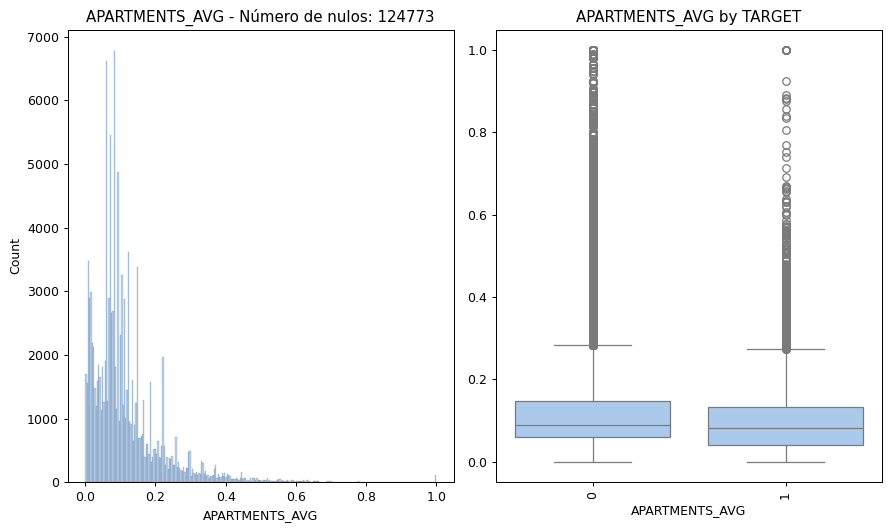

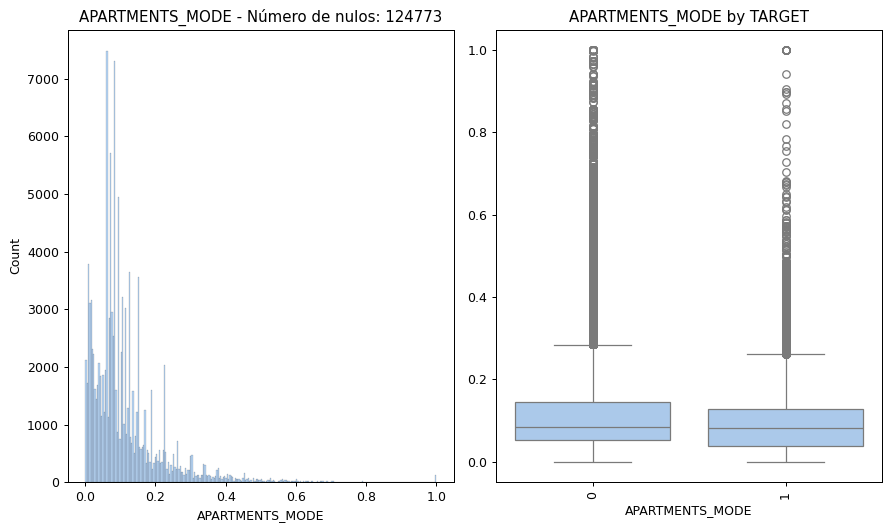

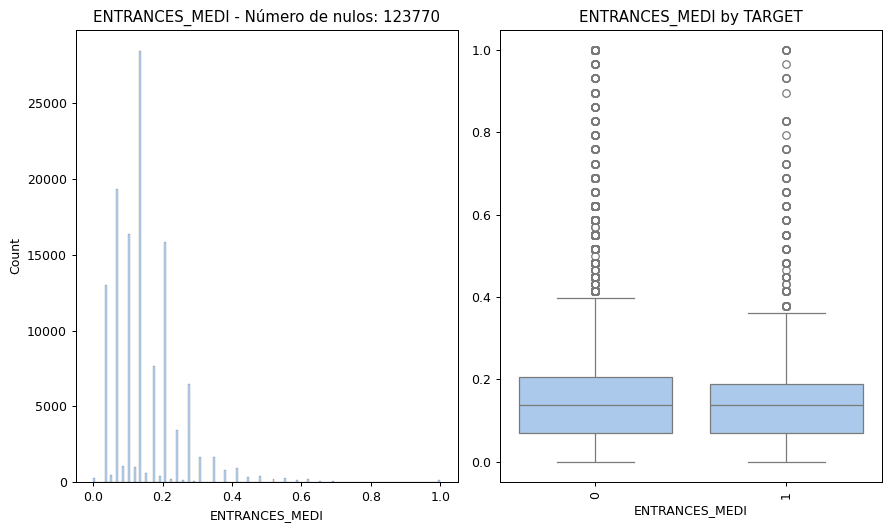

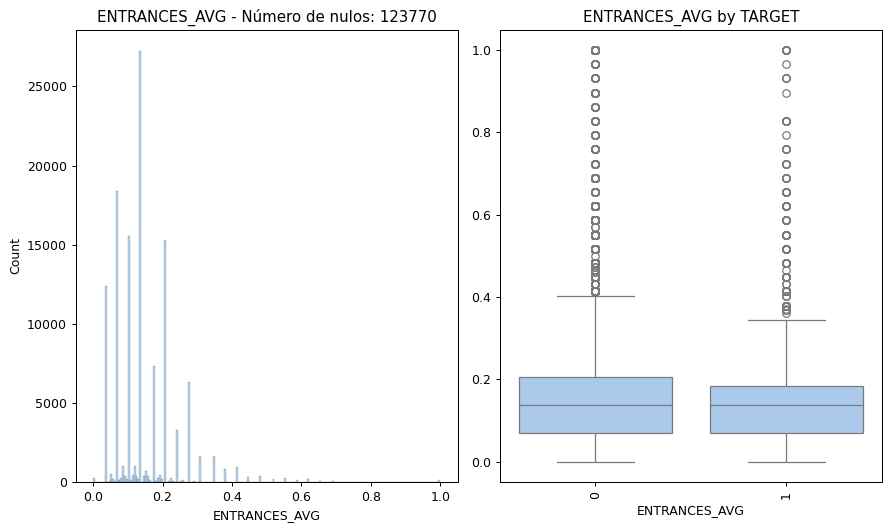

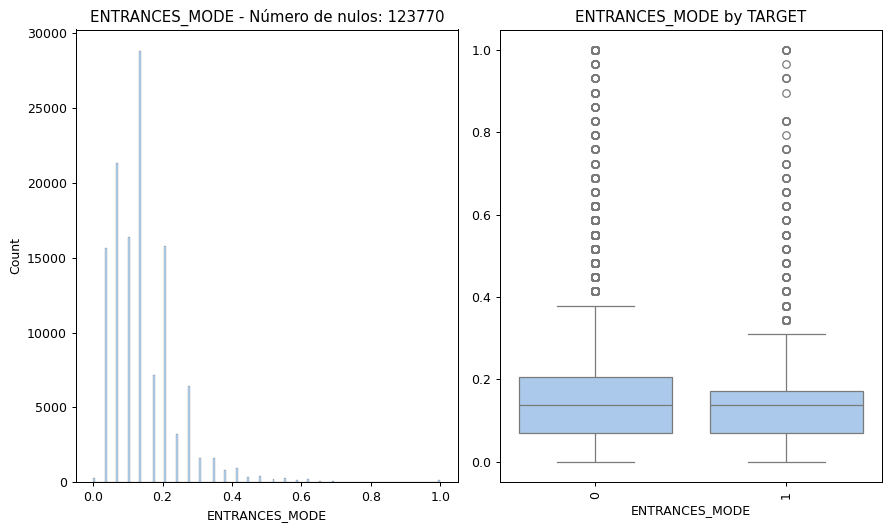

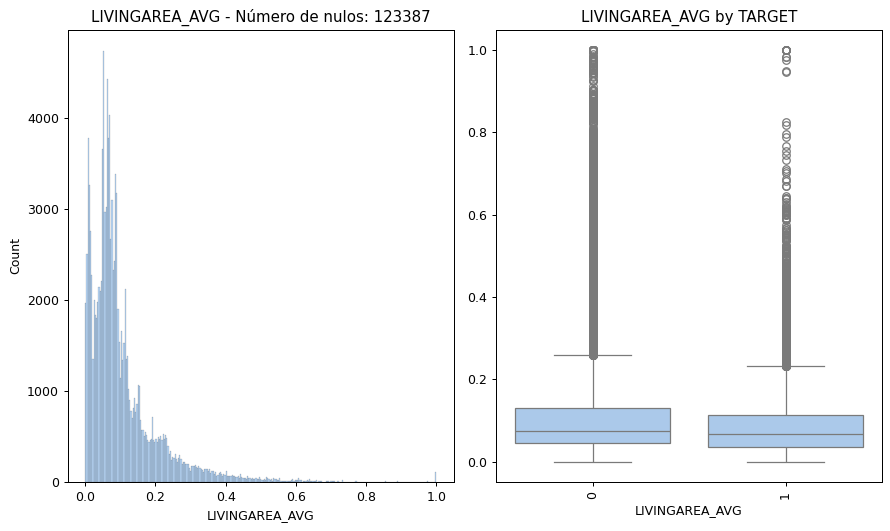

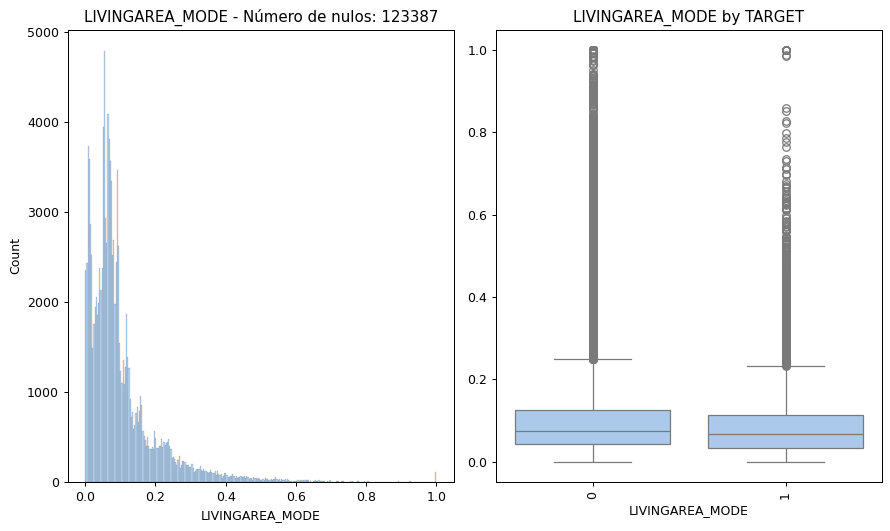

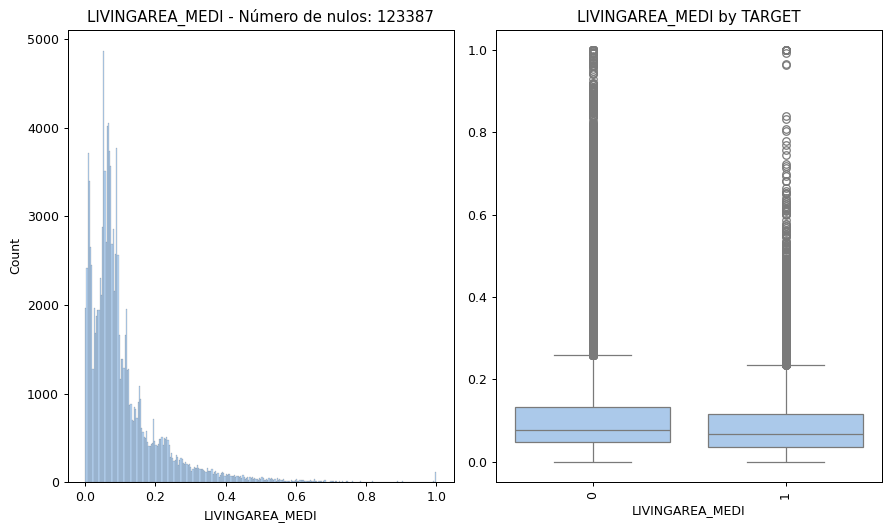

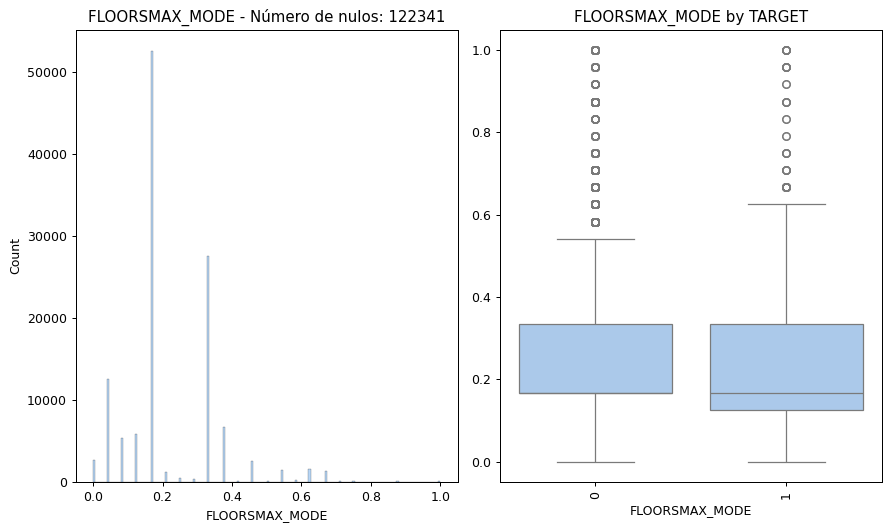

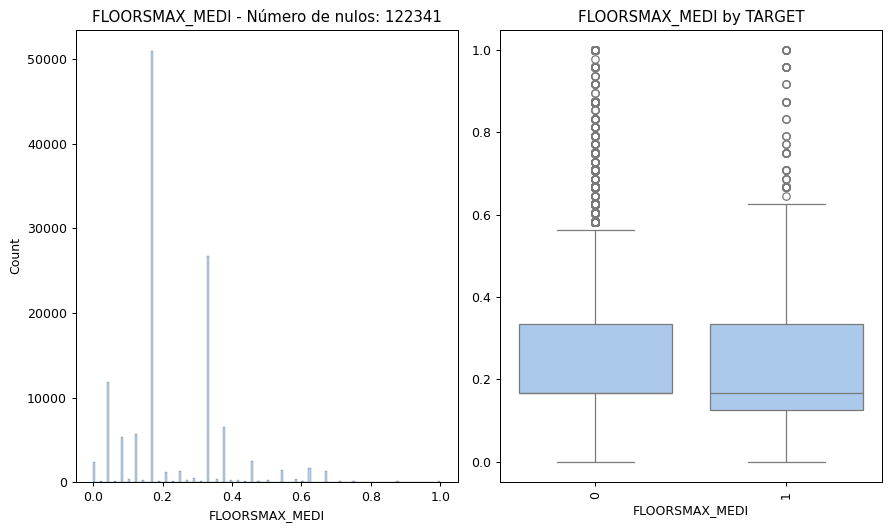

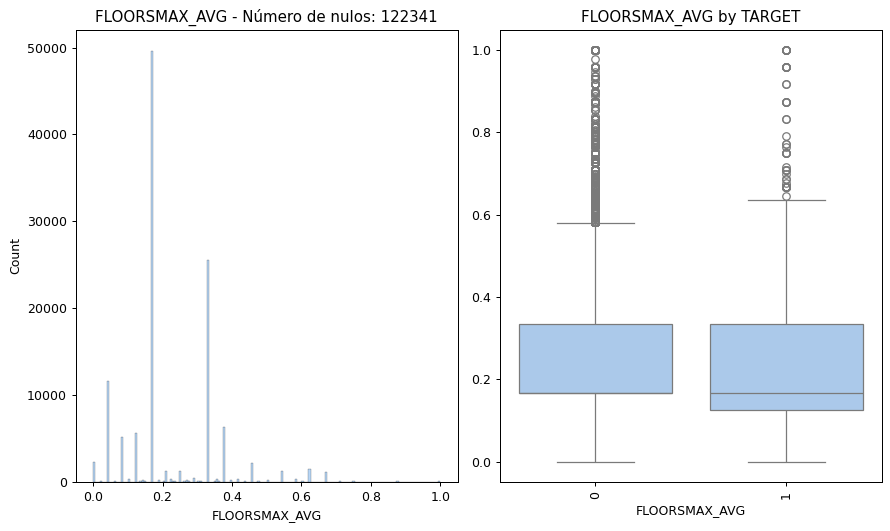

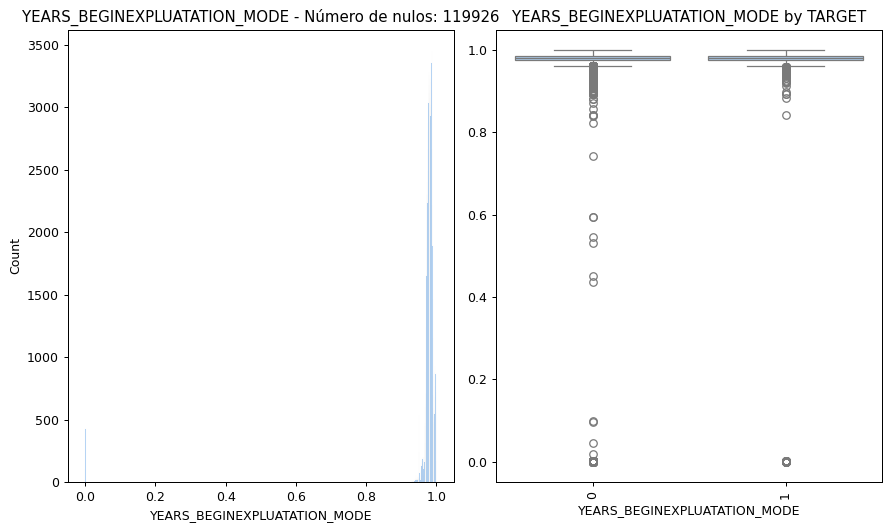

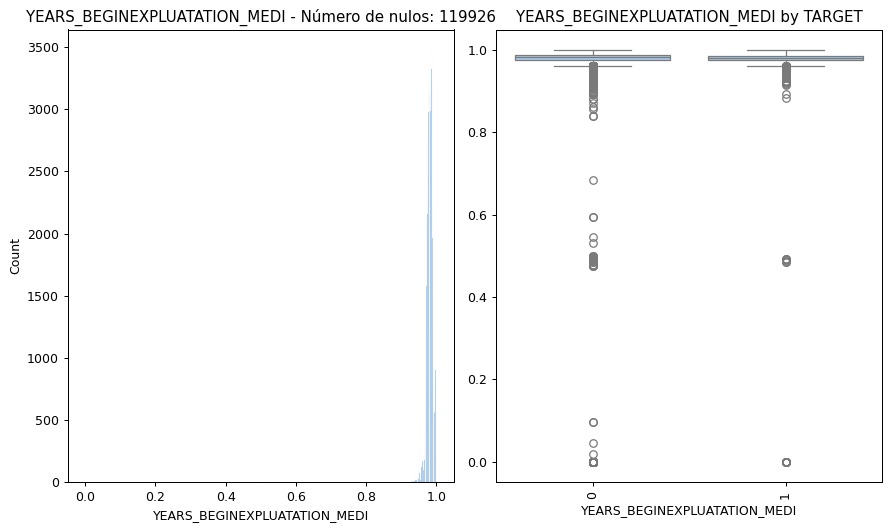

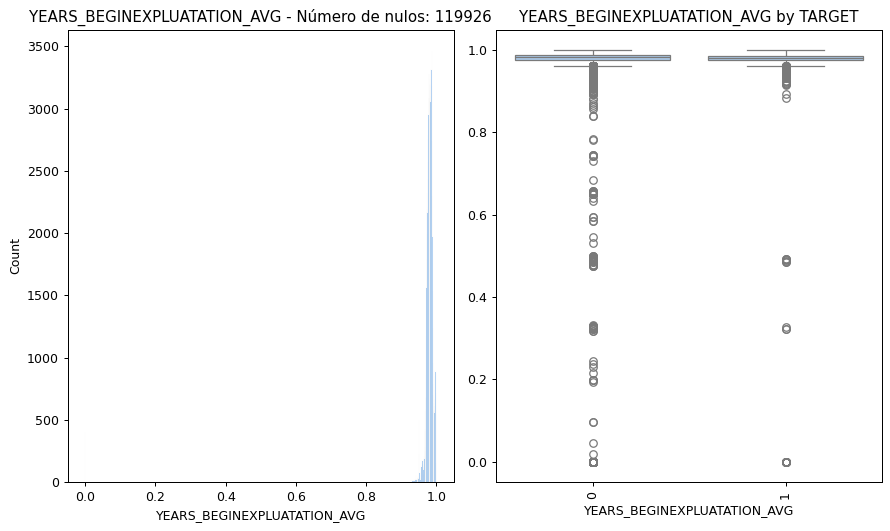

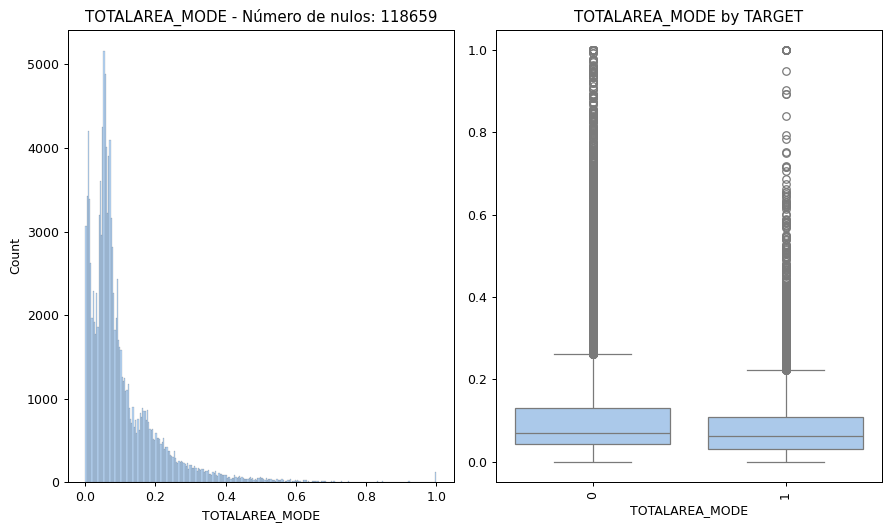

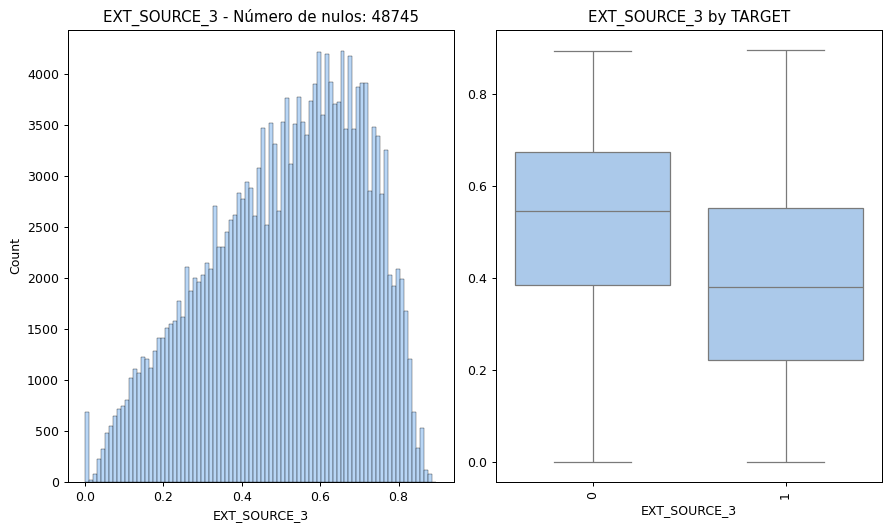

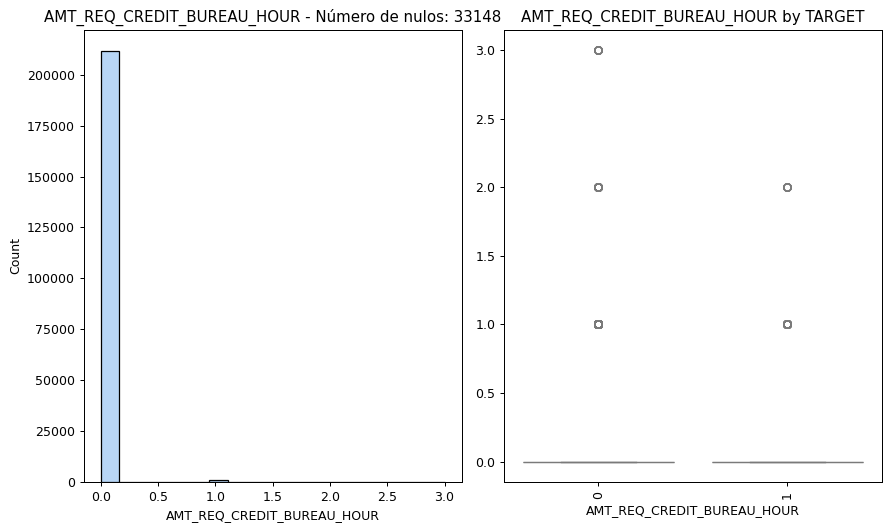

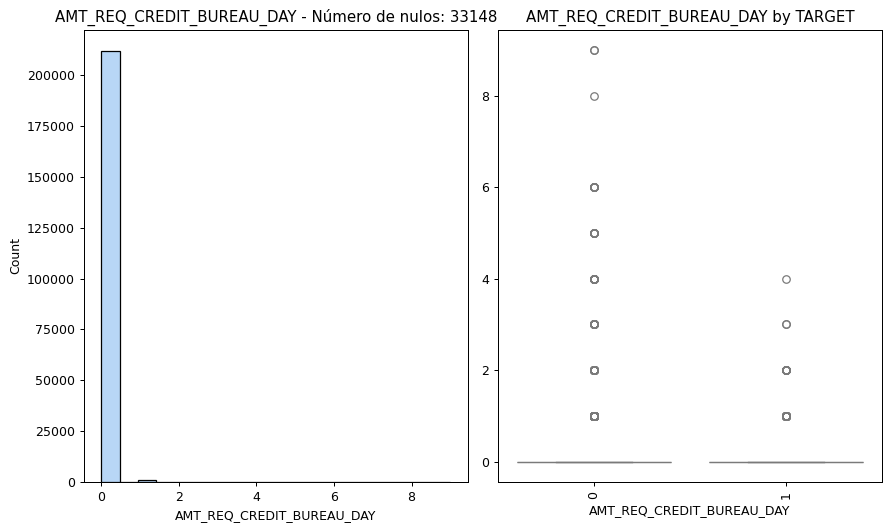

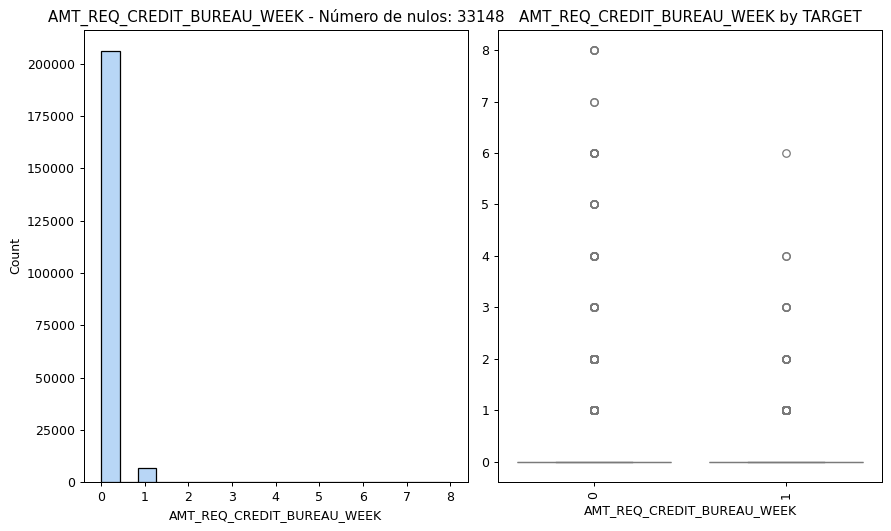

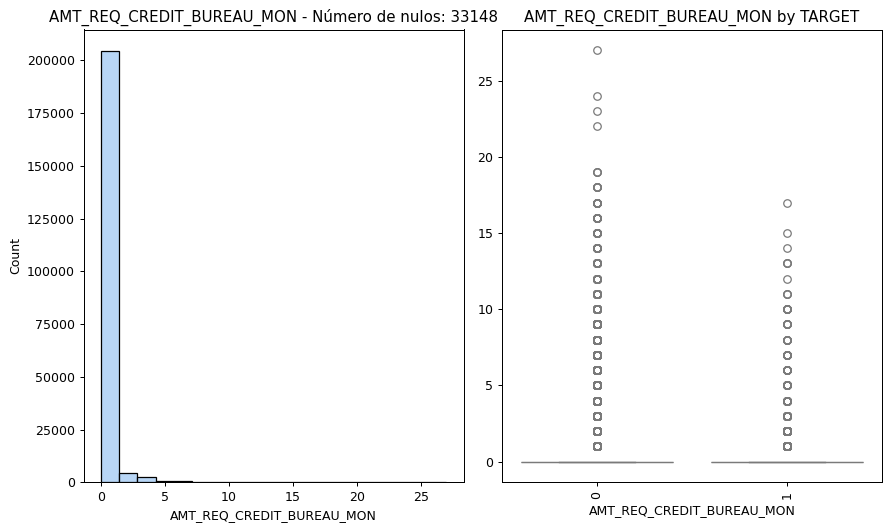

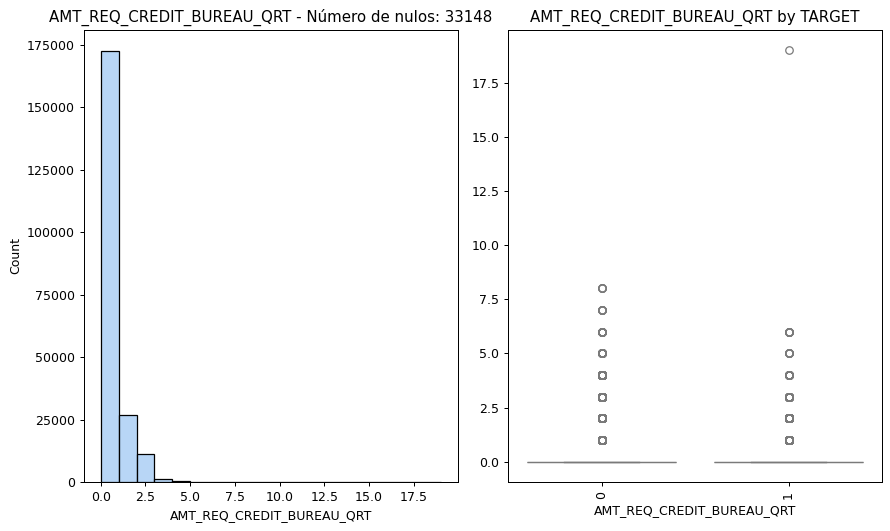

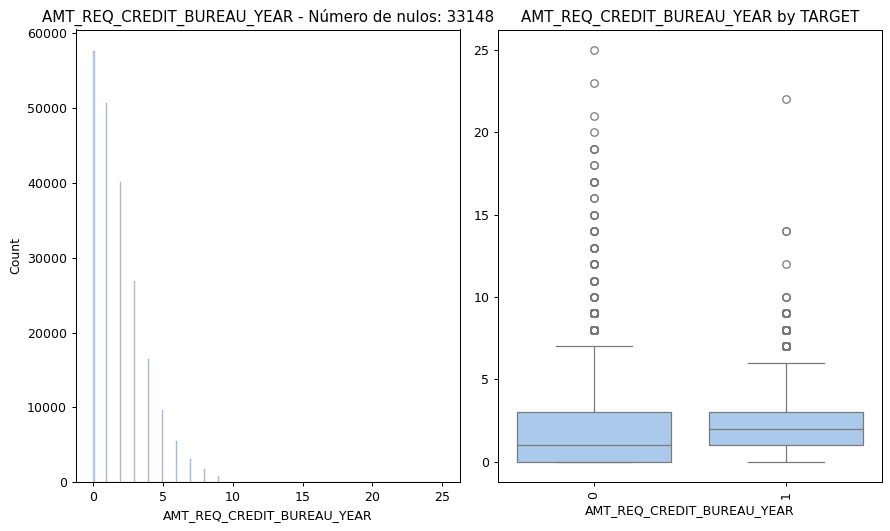

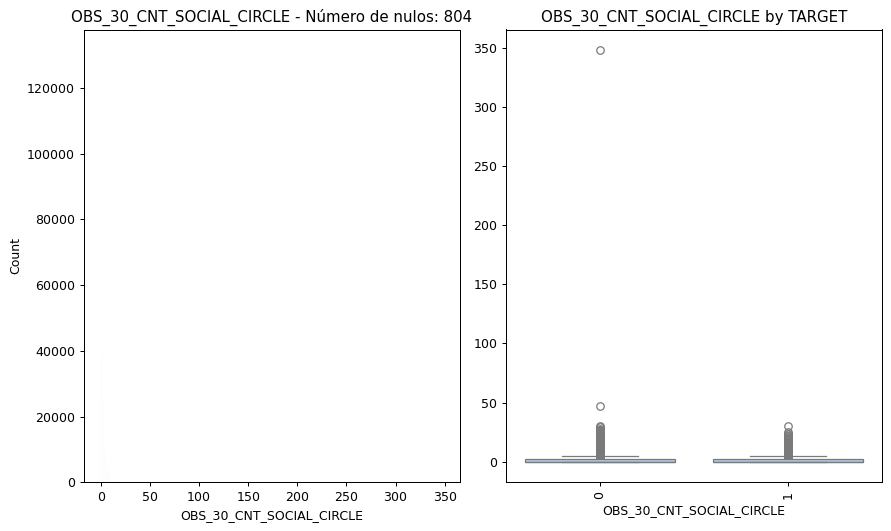

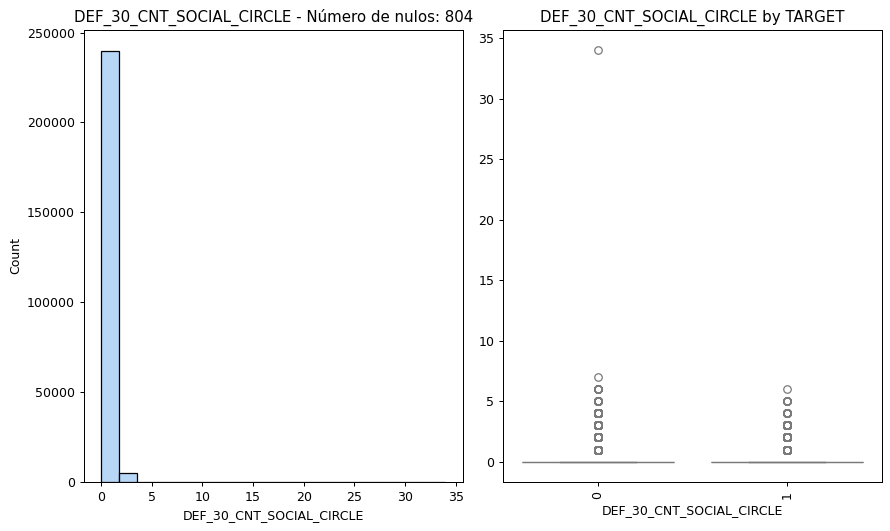

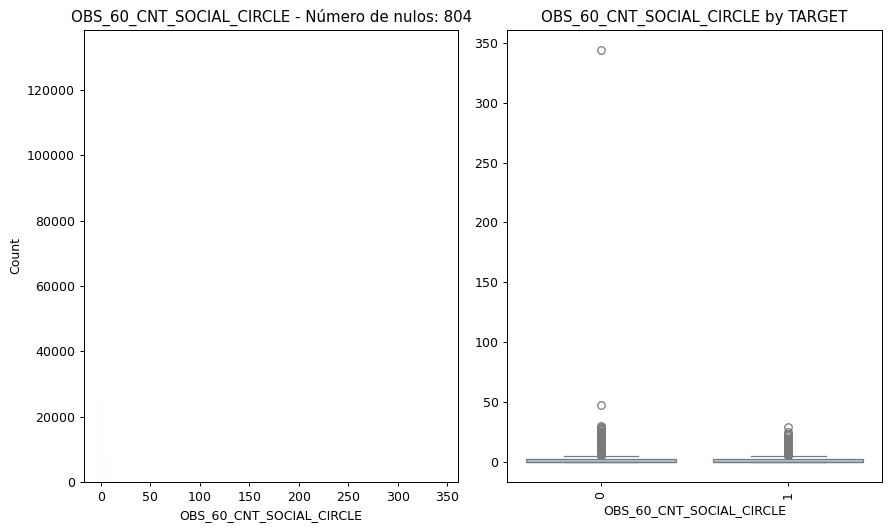

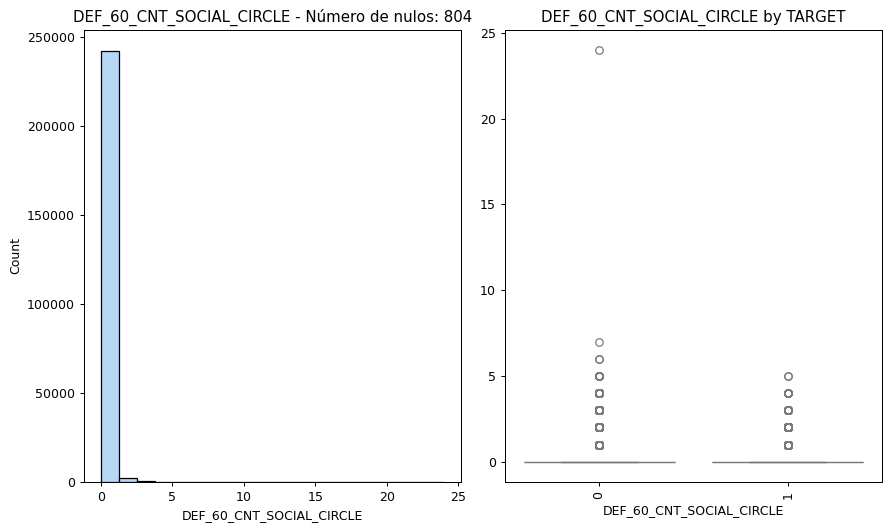

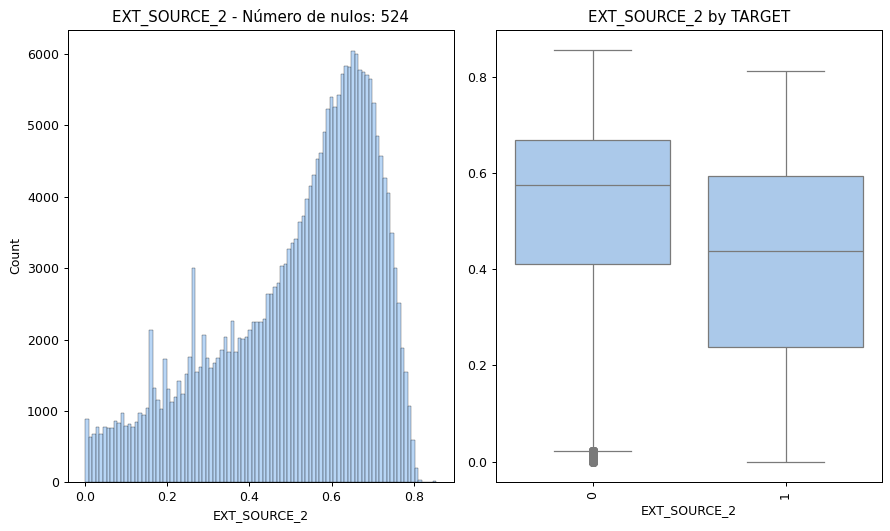

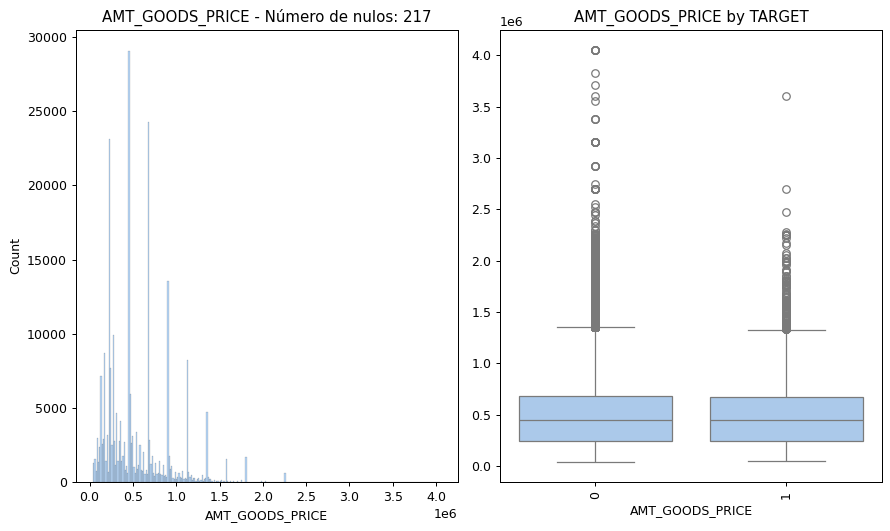

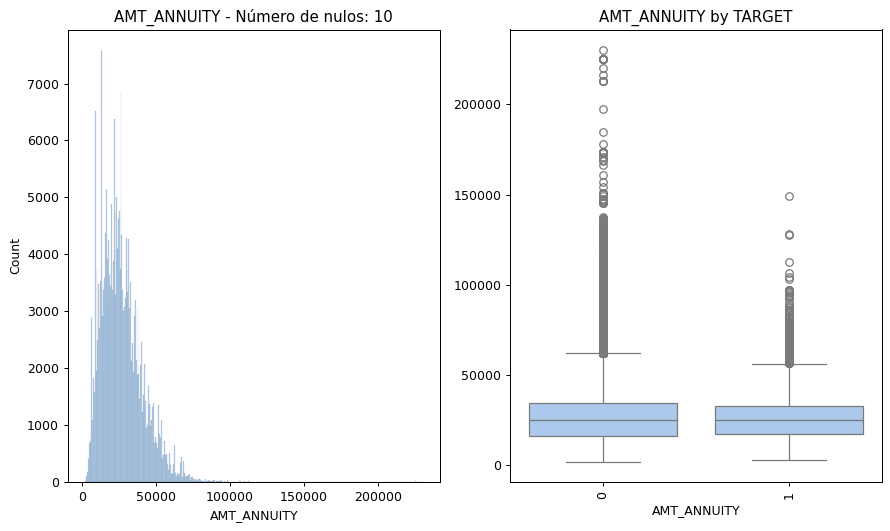

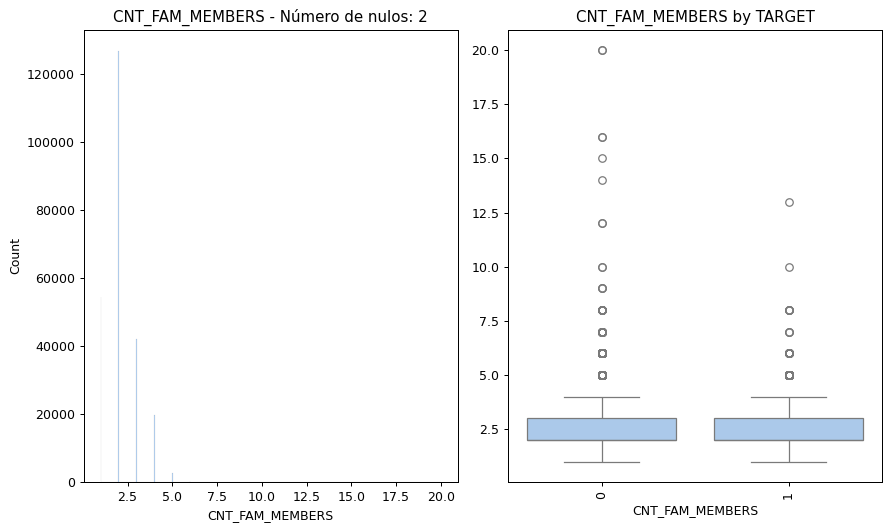

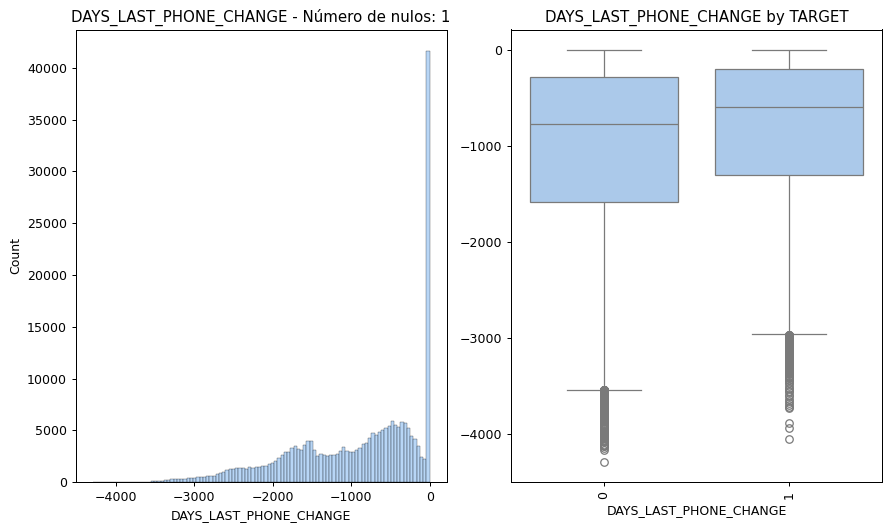

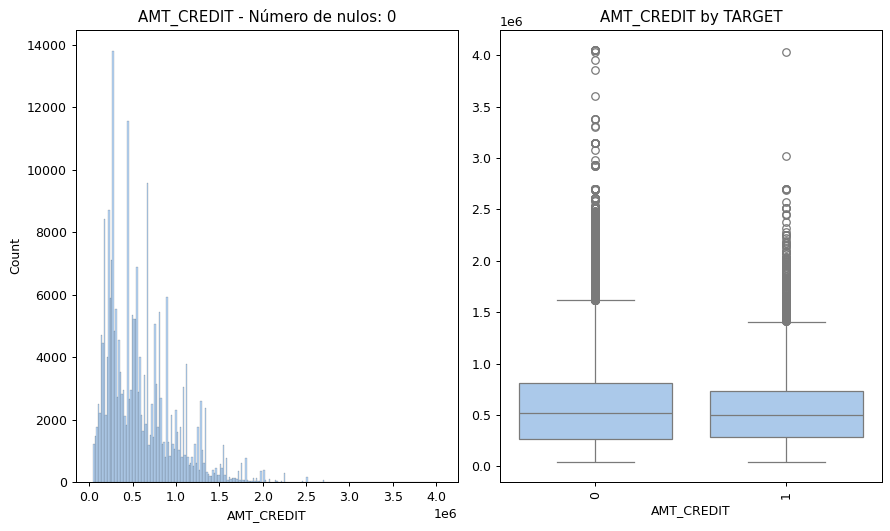

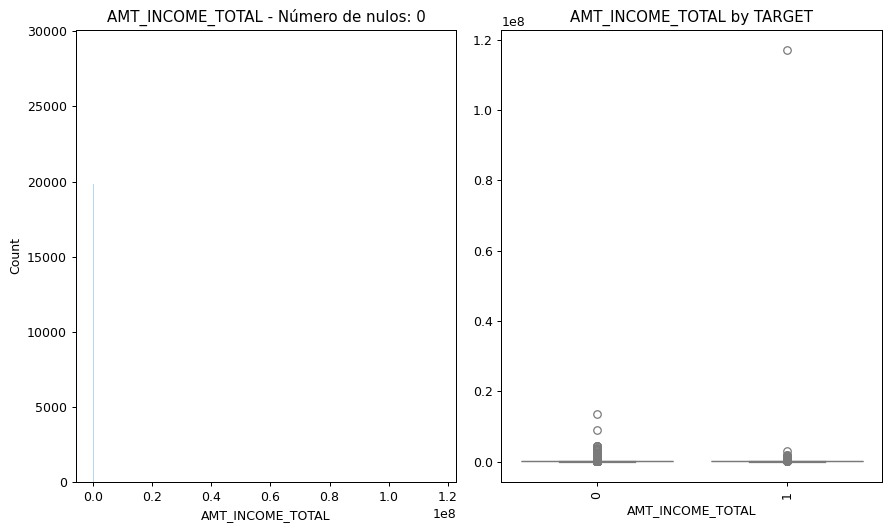

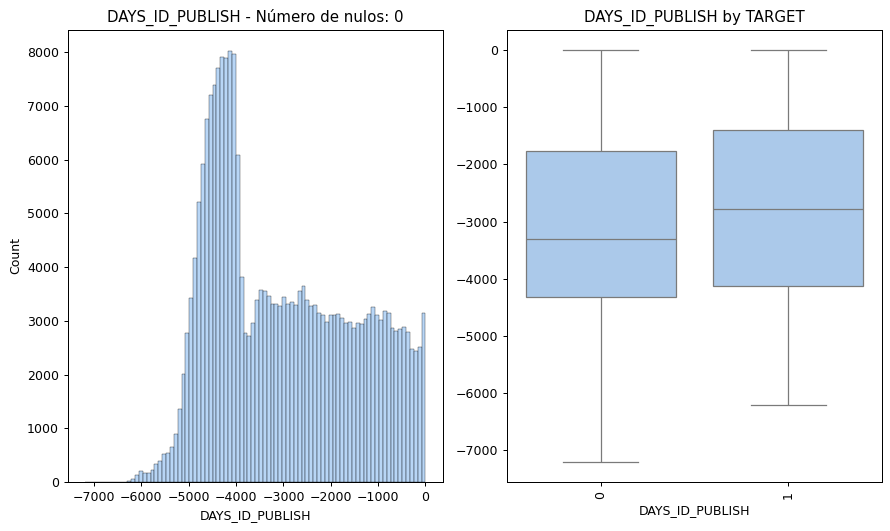

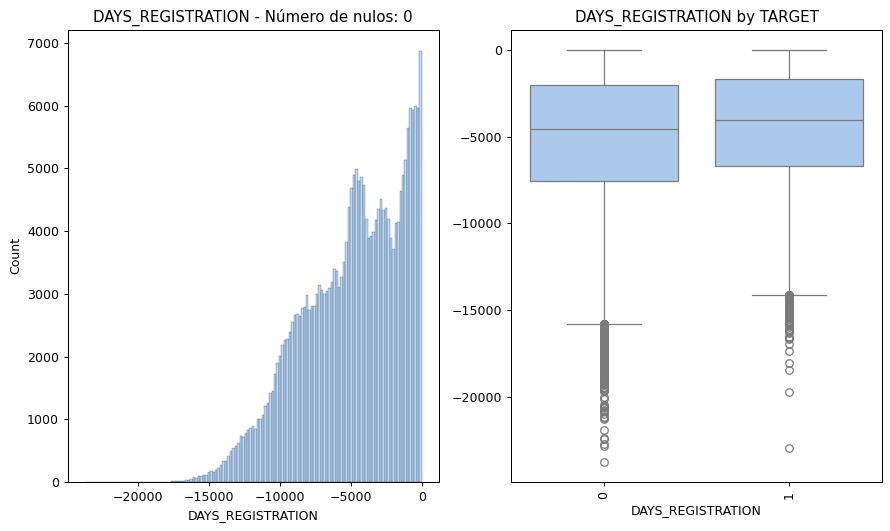

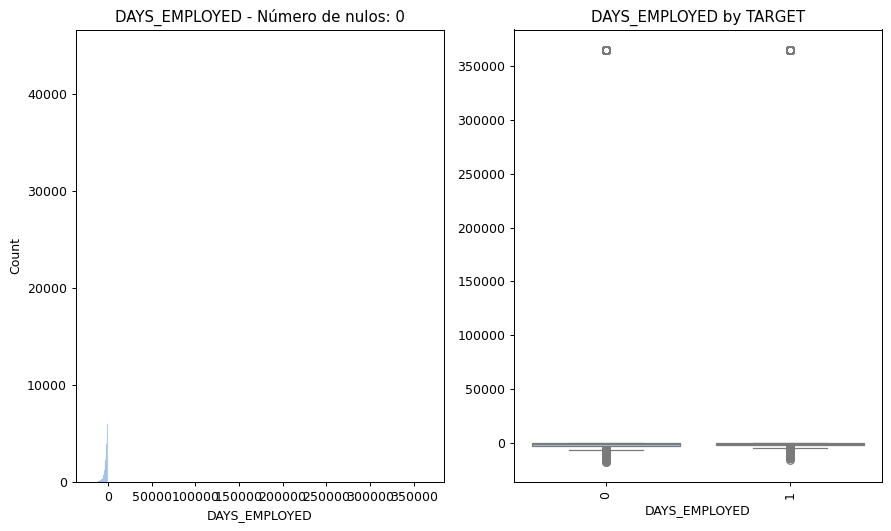

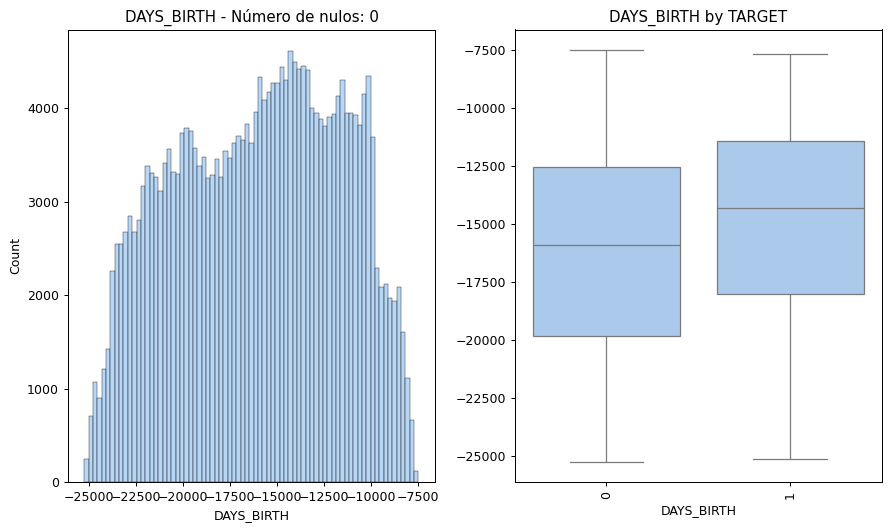

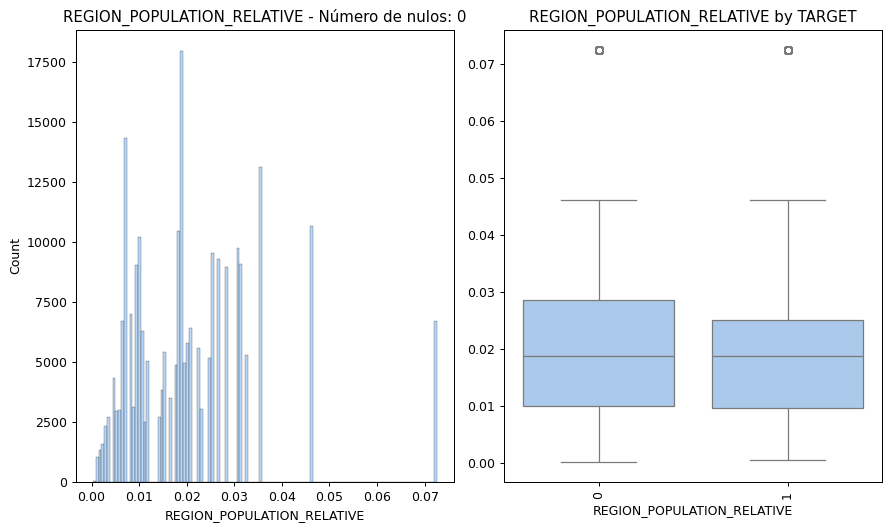

In [113]:
### Distribuación de las variables respecto al target
for i in columnas_continuas:
    if  i!='TARGET' and i!= 'SK_ID_CURR':
        plot_feature(df_loan_train, col_name=i, isContinuous=True, target='TARGET')
    
    plt.show()

In [14]:
df_loan_train['AMT_INCOME_TOTAL'].value_counts()

AMT_INCOME_TOTAL
135000.0    28517
112500.0    24866
157500.0    21326
180000.0    19806
90000.0     18004
            ...  
124141.5        1
179163.0        1
71154.0         1
109899.0        1
93667.5         1
Name: count, Length: 2130, dtype: int64

In [82]:
print(df_loan_train.shape)
print(df_loan_train[lista_categoricas].isnull().sum())

(246008, 122)
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1033
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                77107
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            168093
HOUSETYPE_MODE                123203
WALLSMATERIAL_MODE            124935
EMERGENCYSTATE_MODE           116410
dtype: int64
